<a href="https://colab.research.google.com/github/JoshnaValli/McDonalds-Market-Segmentation-Analysis/blob/main/McDonalds_Market_Segmentation_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
data = pd.read_csv('mcdonalds.csv')

Exploring Data

In [ ]:
data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [ ]:
data.shape
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [ ]:
print(pd.isnull(data).sum()) #No null values are present in any of the columns

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64


Data Preprocessing

In [ ]:
data1= data.iloc[:,0:11].replace({"Yes":1,"No":0})
data1

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1
1449,1,1,0,1,0,0,1,1,0,1,0
1450,1,1,0,1,0,1,0,1,1,0,0
1451,1,1,0,0,0,1,1,1,0,1,0


In [ ]:
from sklearn.manifold import TSNE
m = TSNE(learning_rate = 50)

tsne_features = m.fit_transform(data1)

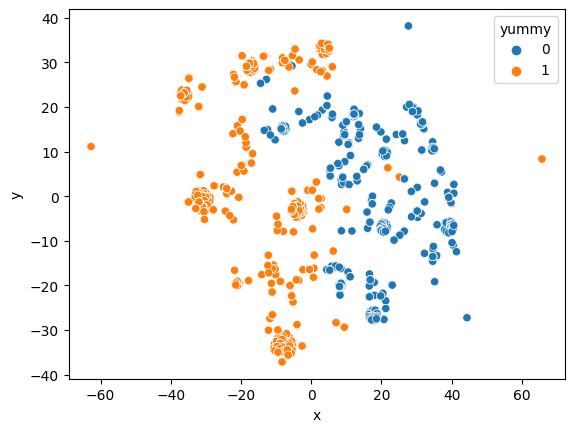

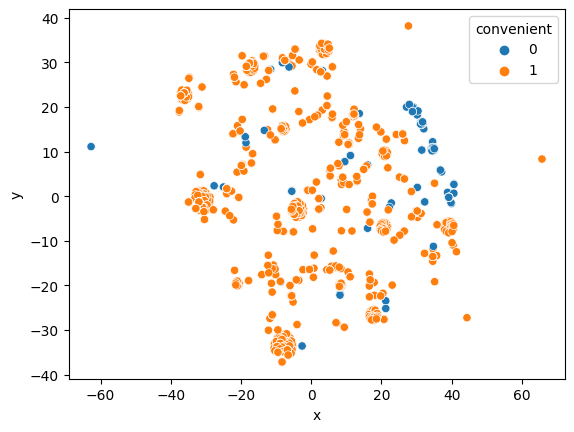

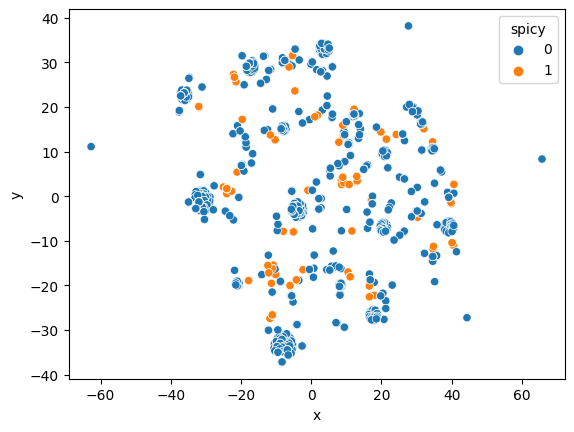

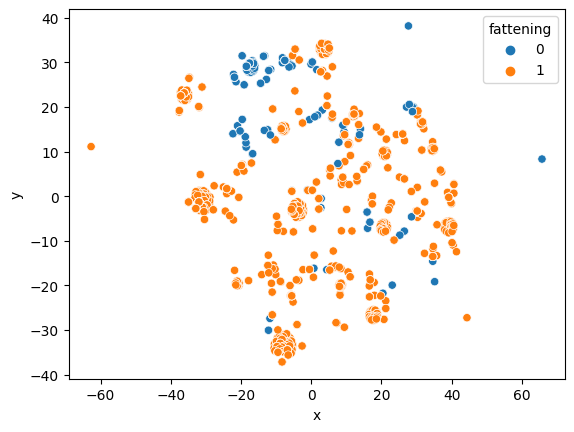

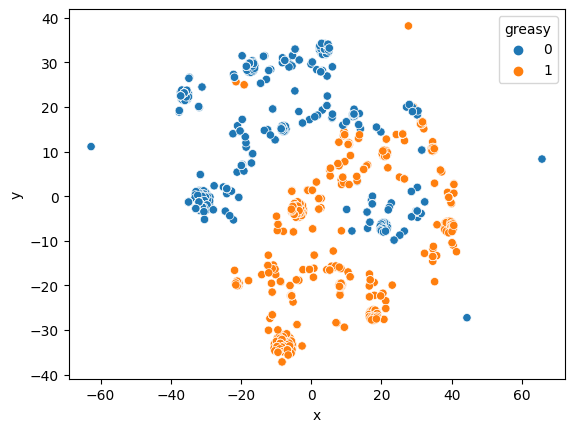

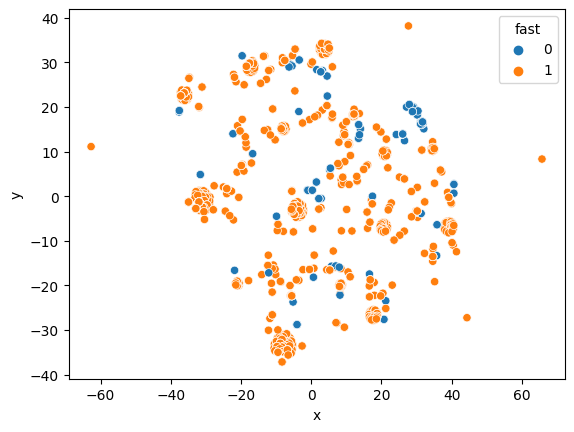

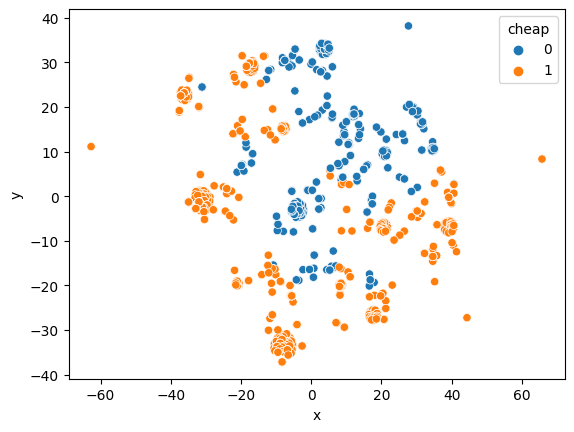

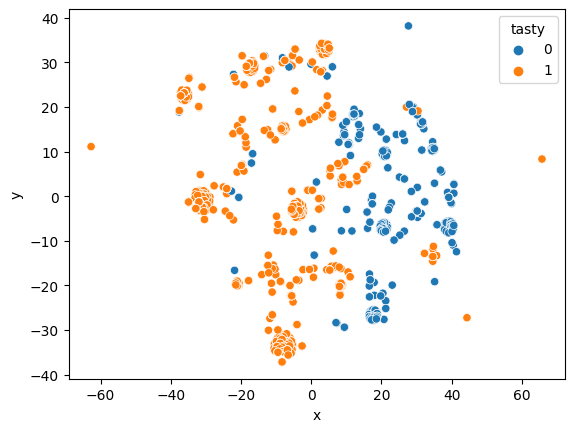

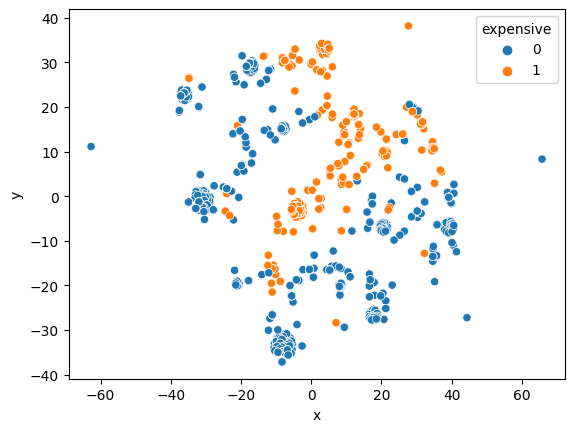

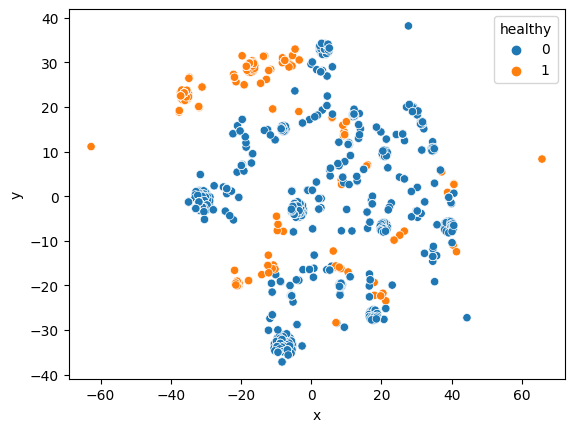

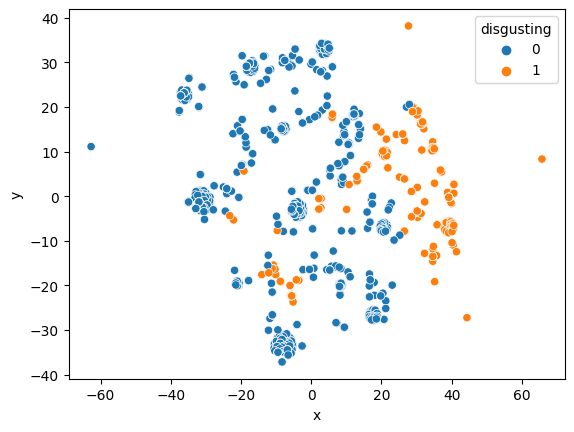

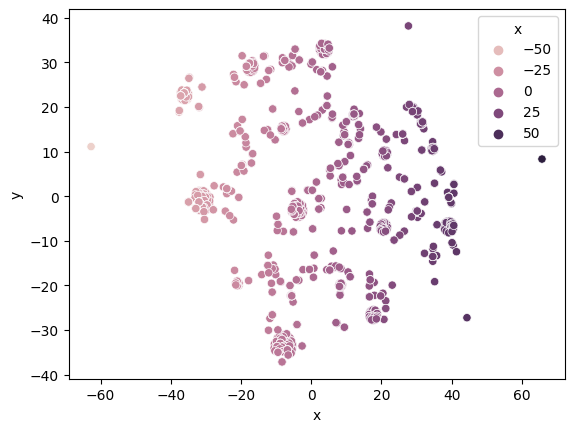

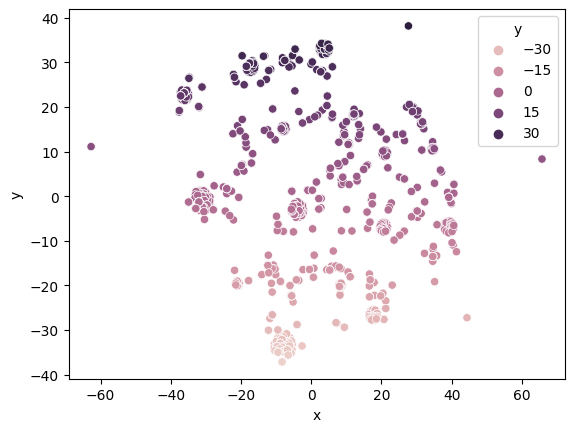

In [ ]:
data1['x'] = tsne_features[:,0]
data1['y'] = tsne_features[:,1]

for feature in data1.columns:
  sns.scatterplot(x="x", y="y",hue = feature, data = data1)
  plt.show()


Categorical Encoding

In [ ]:
data = pd.read_csv('mcdonalds.csv')

In [ ]:
final = {'Yes':1, 'No':0}
final1 = {'Male':1, 'Female':2}
final2 = {'Every three months':3,'Once a year':4,'Once a month':5,'Once a week':6,'More than once a week':7,'Never':8}
final3 = {'I love it!+5':5,'I hate it!-5':-5,'-4':-4,'-3':-3,'-2':-2,'-1':-1,'0':0,'+1':1,'+2':2,'+3':3,'+4':4}
data["yummy"] = data.yummy.map(final)
data["convenient"] = data.convenient.map(final)
data["spicy"] = data.spicy.map(final)
data["fattening"] = data.fattening.map(final)
data["greasy"] = data.greasy.map(final)
data["fast"] = data.fast.map(final)
data["cheap"] = data.cheap.map(final)
data["tasty"] = data.tasty.map(final)
data["expensive"] = data.expensive.map(final)
data["healthy"] = data.healthy.map(final)
data["disgusting"] = data.disgusting.map(final)
data["Like"] = data.Like.map(final3)
data["VisitFrequency"] = data.VisitFrequency.map(final2)
data["Gender"] = data.Gender.map(final1)

data


,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,3,2
1,1,1,0,1,1,1,1,1,1,0,0,2,51,3,2
2,0,1,1,1,1,1,0,1,1,1,0,1,62,3,2
3,1,1,0,1,1,1,1,1,0,0,1,4,69,6,2
4,0,1,0,1,1,1,1,0,0,1,0,2,49,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,-5,47,4,1
1449,1,1,0,1,0,0,1,1,0,1,0,2,36,6,2
1450,1,1,0,1,0,1,0,1,1,0,0,3,52,5,2
1451,1,1,0,0,0,1,1,1,0,1,0,4,41,3,1


Histogram

array([[<Axes: title={'center': 'yummy'}>,
        <Axes: title={'center': 'convenient'}>,
        <Axes: title={'center': 'spicy'}>,
        <Axes: title={'center': 'fattening'}>,
        <Axes: title={'center': 'greasy'}>,
        <Axes: title={'center': 'fast'}>,
        <Axes: title={'center': 'cheap'}>,
        <Axes: title={'center': 'tasty'}>,
        <Axes: title={'center': 'expensive'}>],
       [<Axes: title={'center': 'healthy'}>,
        <Axes: title={'center': 'disgusting'}>,
        <Axes: title={'center': 'Like'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'VisitFrequency'}>,
        <Axes: title={'center': 'Gender'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

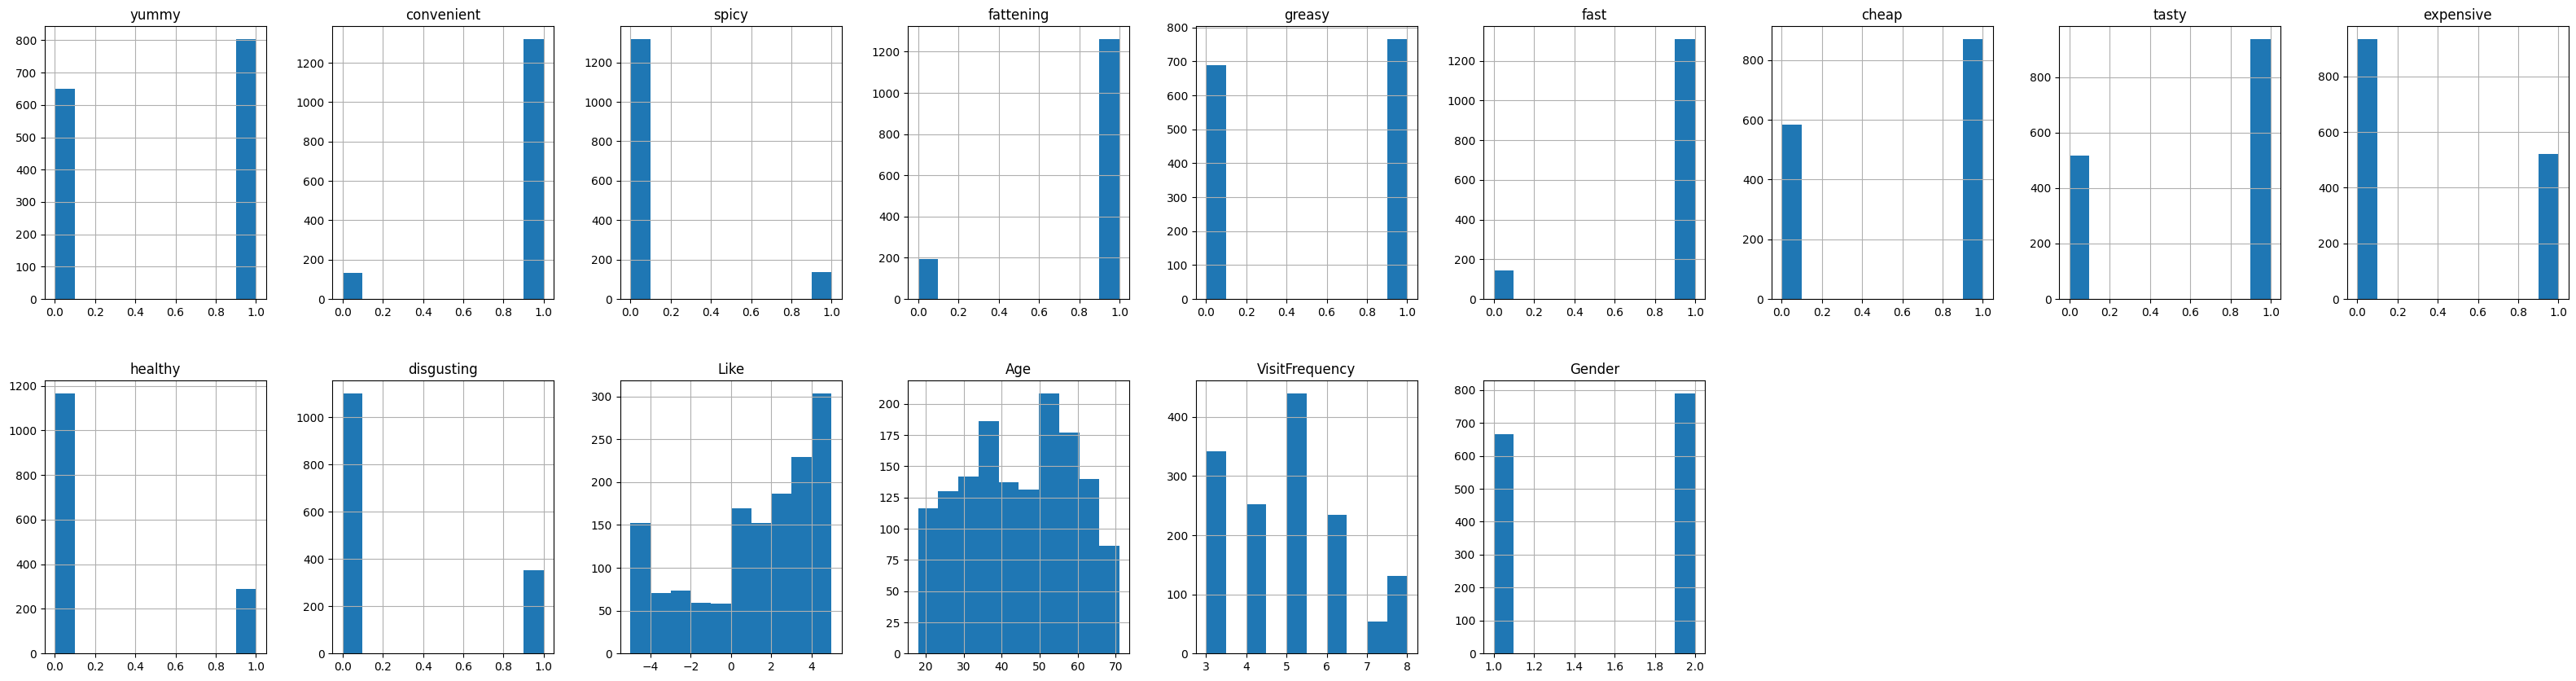

In [ ]:
data.hist(layout=(2,9), figsize=(40,10))

HeatMap(Matrix)

<Axes: >

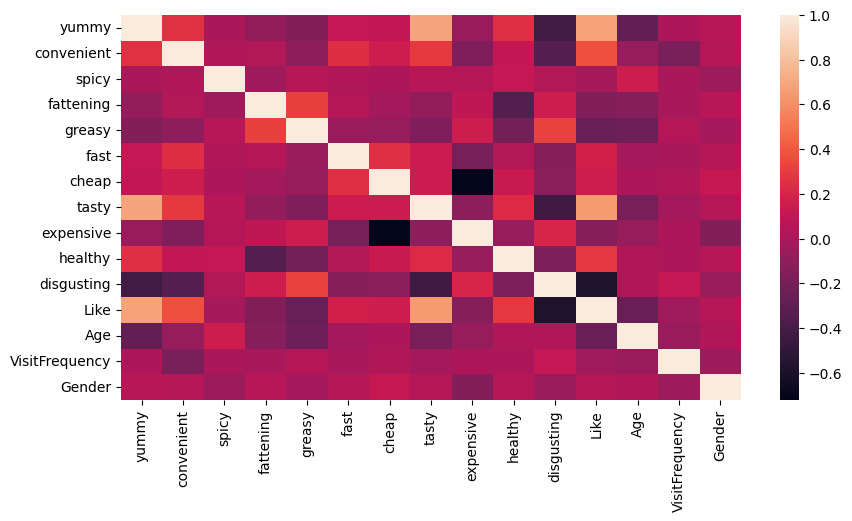

In [ ]:
corr=data.corr()
plt.figure(1, figsize=(10,5))
sns.heatmap(corr)

Finding Number of Clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

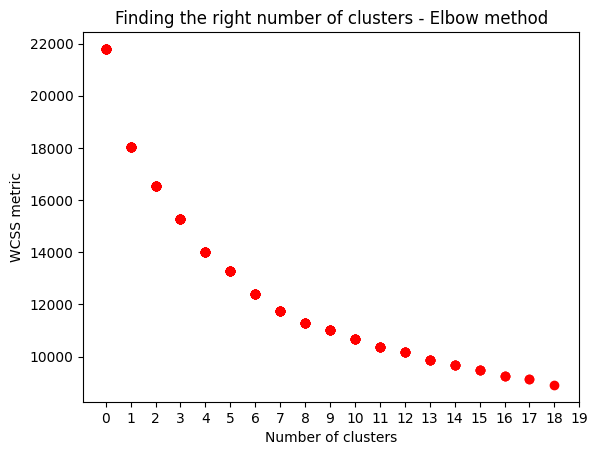

In [ ]:
data.loc[data['cheap'] == '', 'cheap'] = 0
data['cheap']=data['cheap'].astype(float)
# Let's scale the data first
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
normalized_data= scaler.fit_transform(data)
#normalized_data
# Compute 'within cluster sum of squares' metric for a range of k clusters
#from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
wcss_values = []
for i in range(1,20):
  kmeans = KMeans(n_clusters=i, init='k-means++')
  kmeans.fit(normalized_data)
  wcss_values.append(kmeans.inertia_)
  plt.plot(wcss_values,'ro')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS metric')
plt.title('Finding the right number of clusters - Elbow method')
plt.xticks(ticks=range(0,20))
plt.show()

Applying K-Means

In [ ]:
kmeans=KMeans(8)
kmeans.fit(normalized_data)
kmeans.cluster_centers_.shape
cluster_centers = pd.DataFrame(data=kmeans.cluster_centers_, columns=[data.columns])
labels = kmeans.labels_
# concatenate the clusters labels to our original dataframe
data_with_centroids = pd.concat([data, pd.DataFrame({'centroid':labels})], axis=1)
data_with_centroids

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,centroid
0,0,1,0,1,0,1,1.0,0,1,0,0,-3,61,3,2,1
1,1,1,0,1,1,1,1.0,1,1,0,0,2,51,3,2,4
2,0,1,1,1,1,1,0.0,1,1,1,0,1,62,3,2,2
3,1,1,0,1,1,1,1.0,1,0,0,1,4,69,6,2,6
4,0,1,0,1,1,1,1.0,0,0,1,0,2,49,5,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0.0,0,1,0,1,-5,47,4,1,3
1449,1,1,0,1,0,0,1.0,1,0,1,0,2,36,6,2,3
1450,1,1,0,1,0,1,0.0,1,1,0,0,3,52,5,2,4
1451,1,1,0,0,0,1,1.0,1,0,1,0,4,41,3,1,0


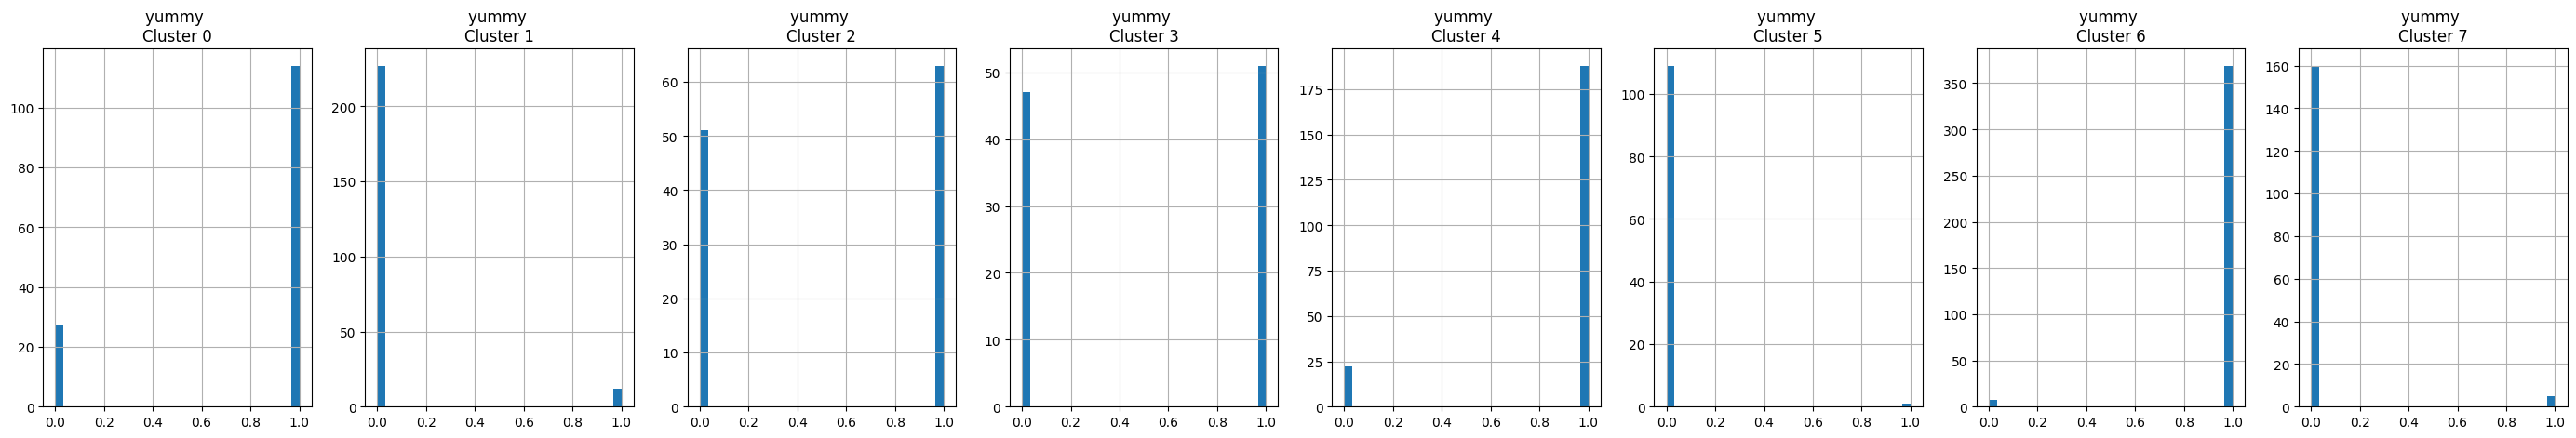

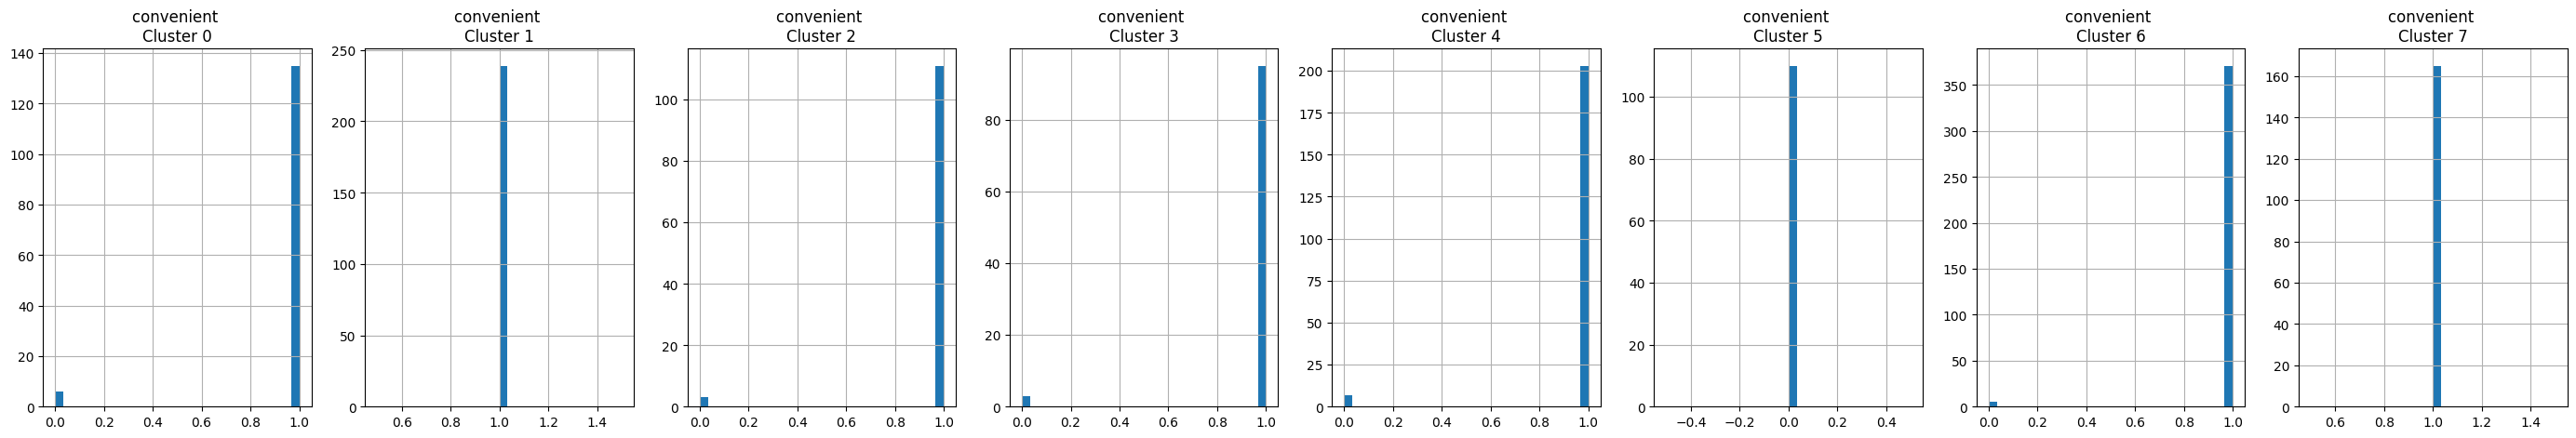

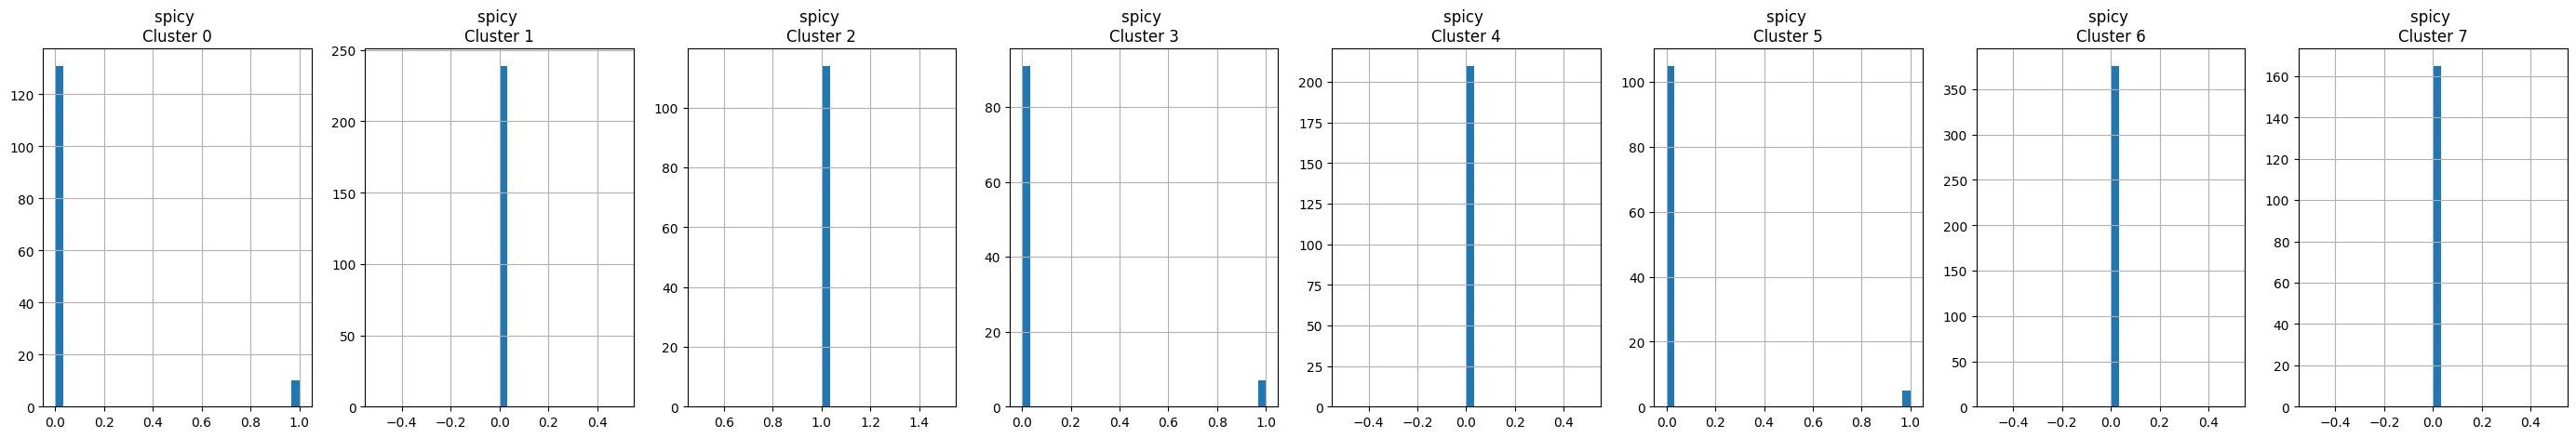

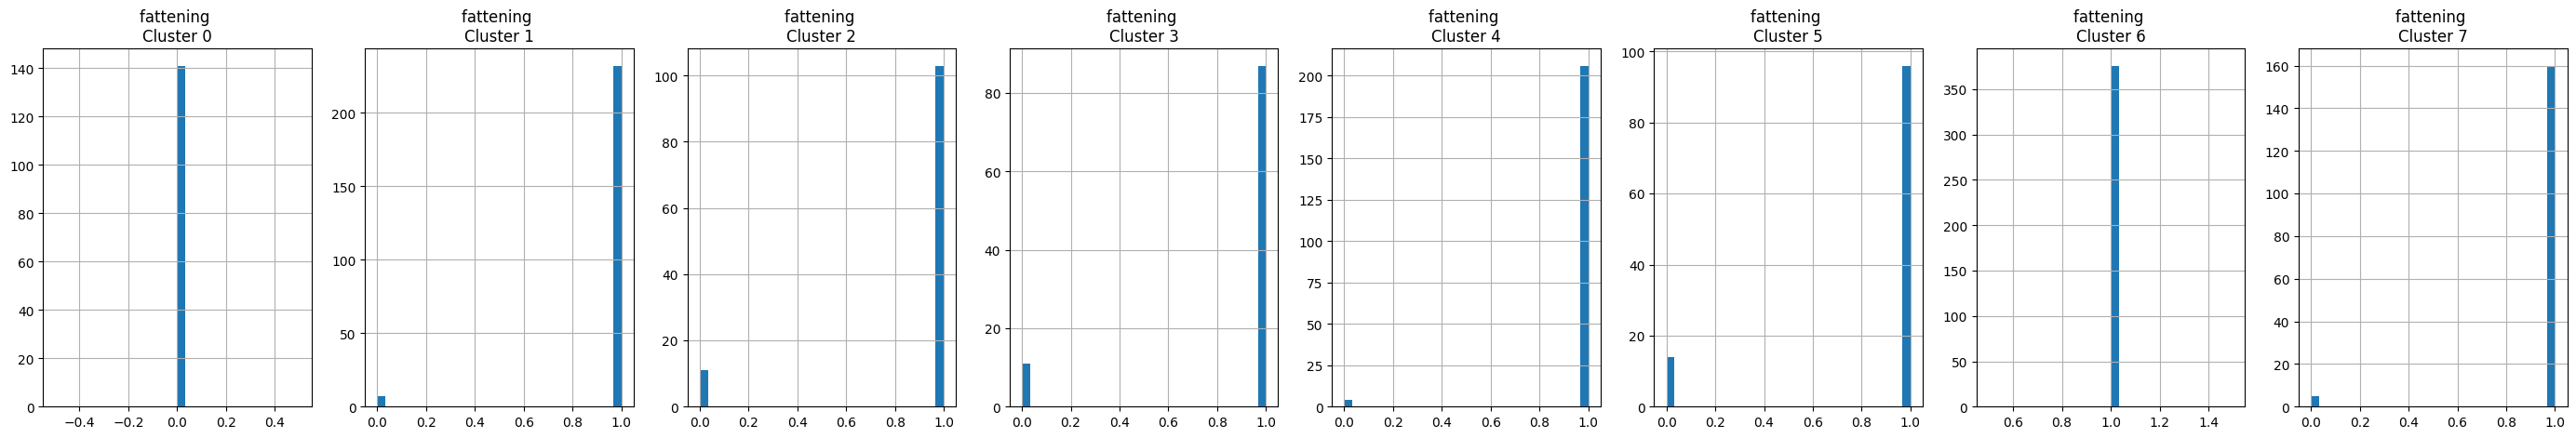

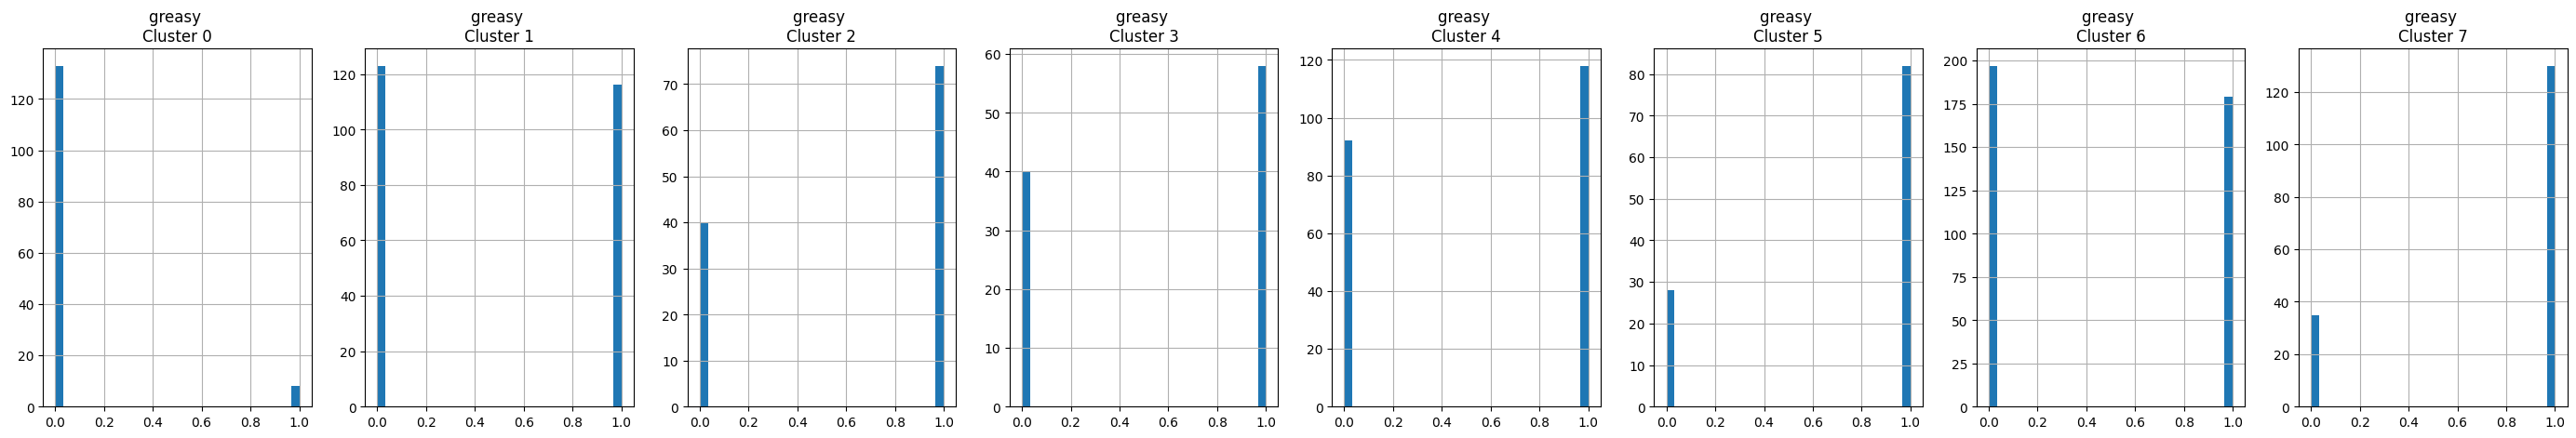

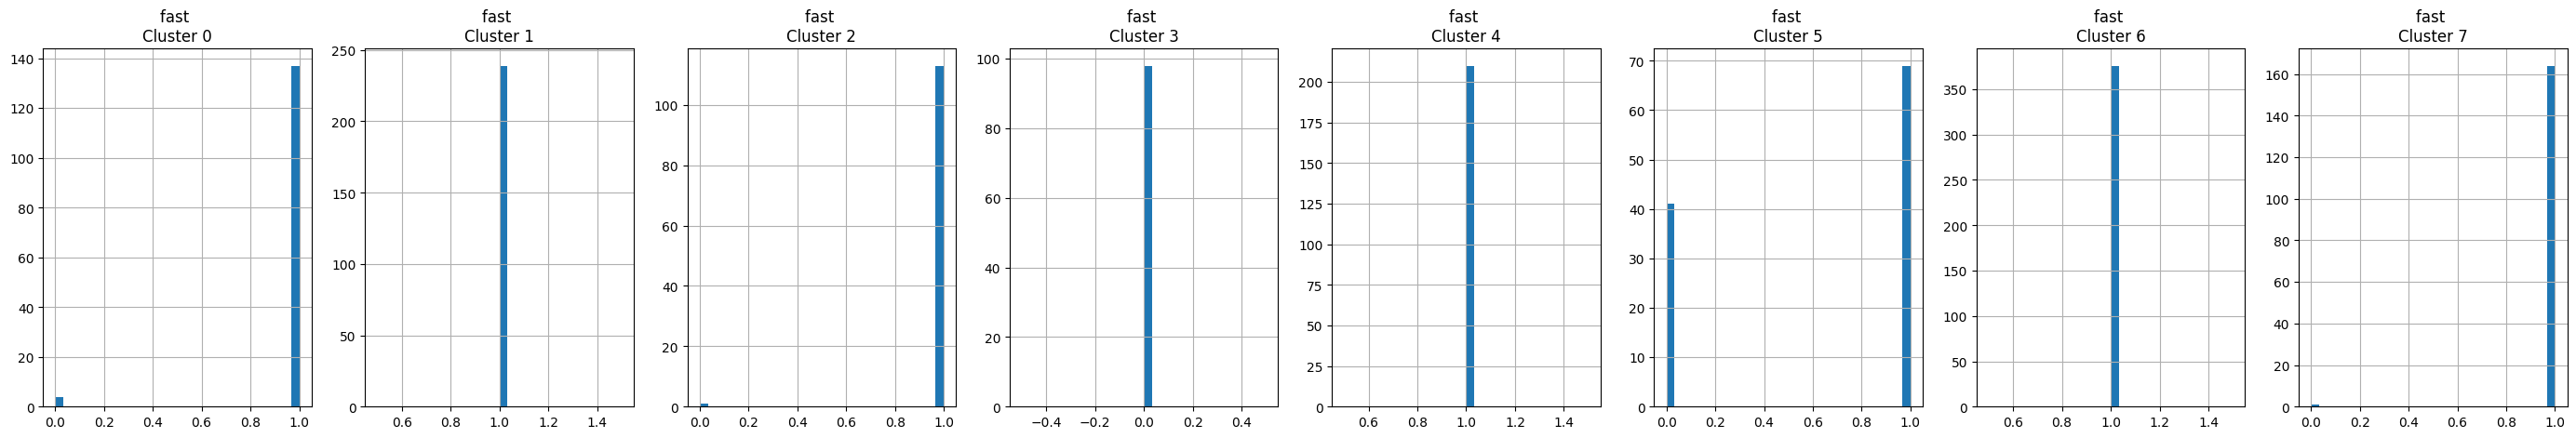

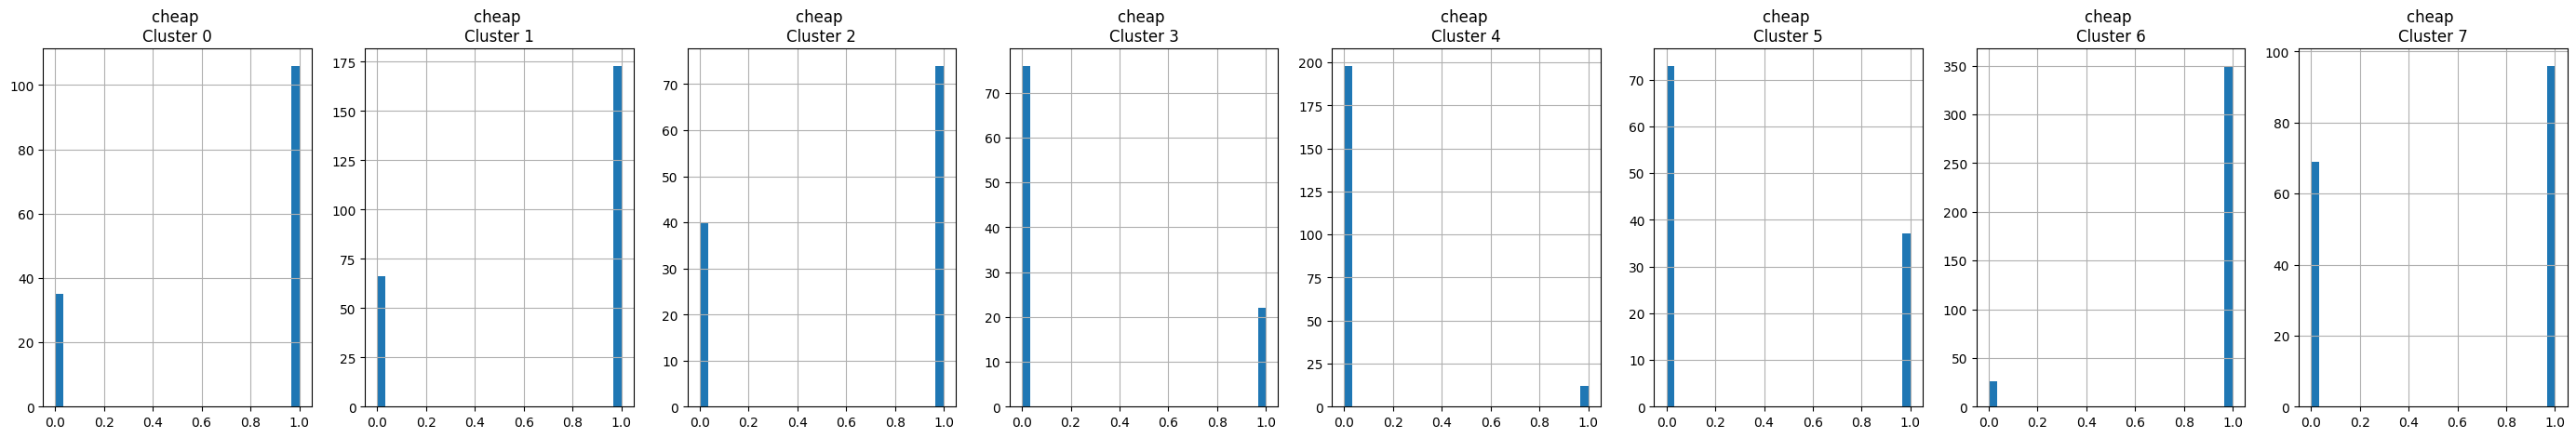

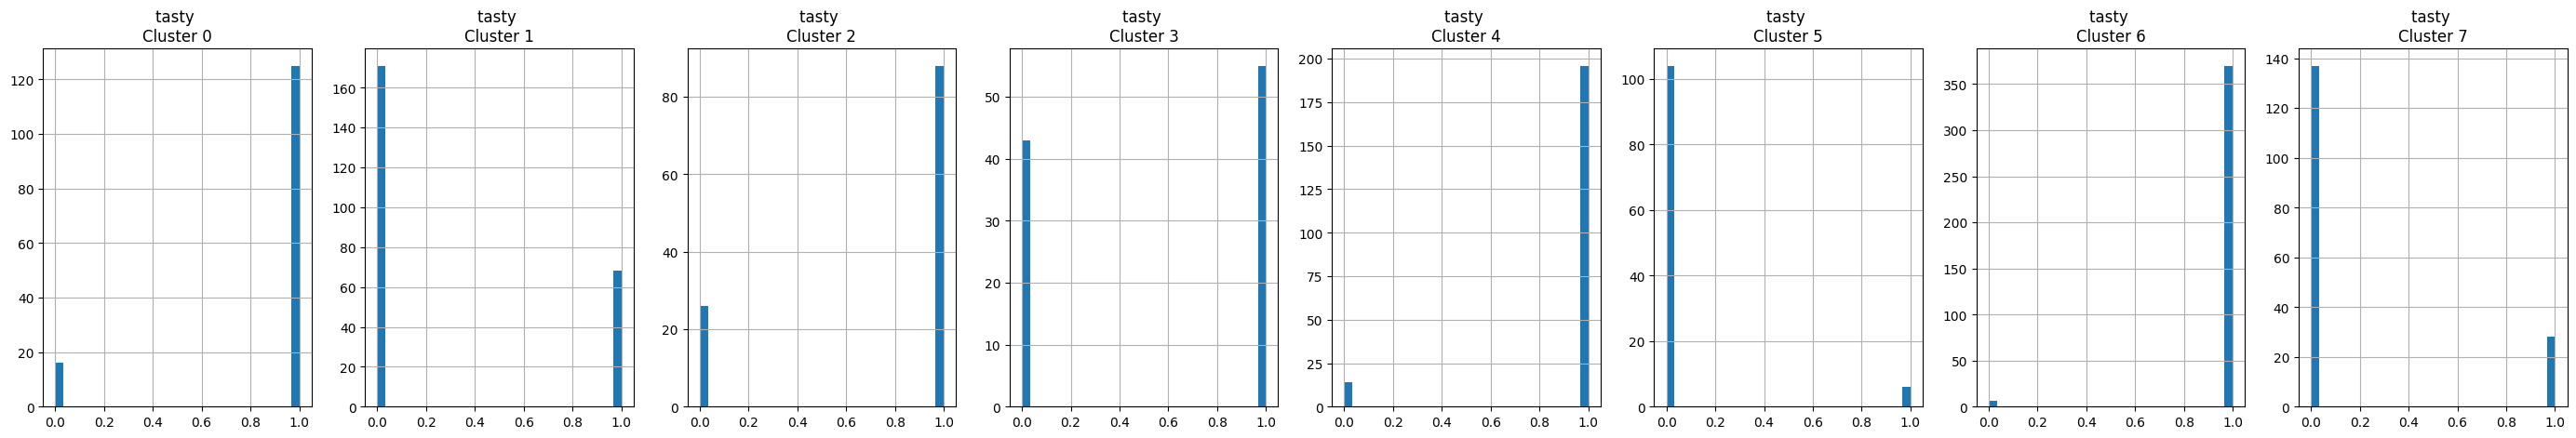

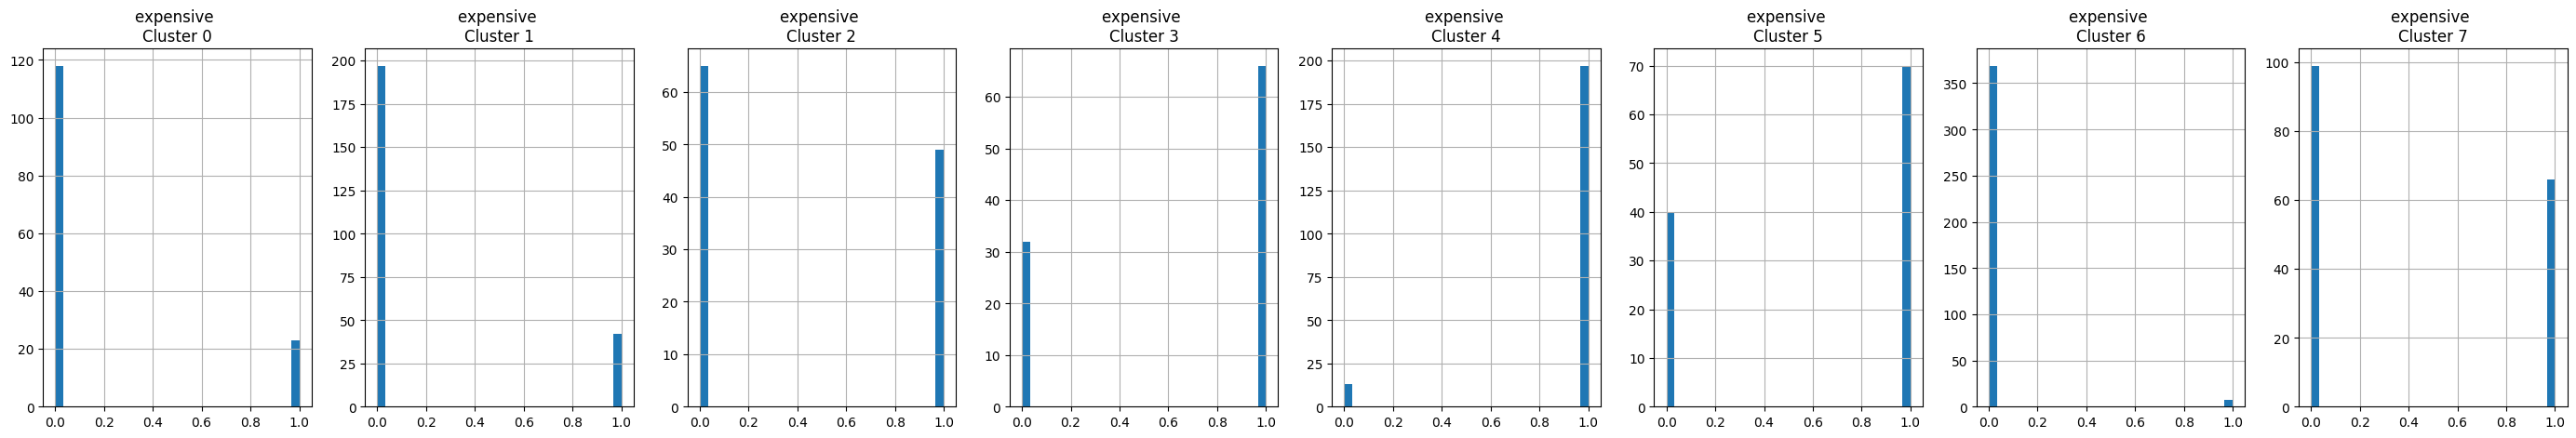

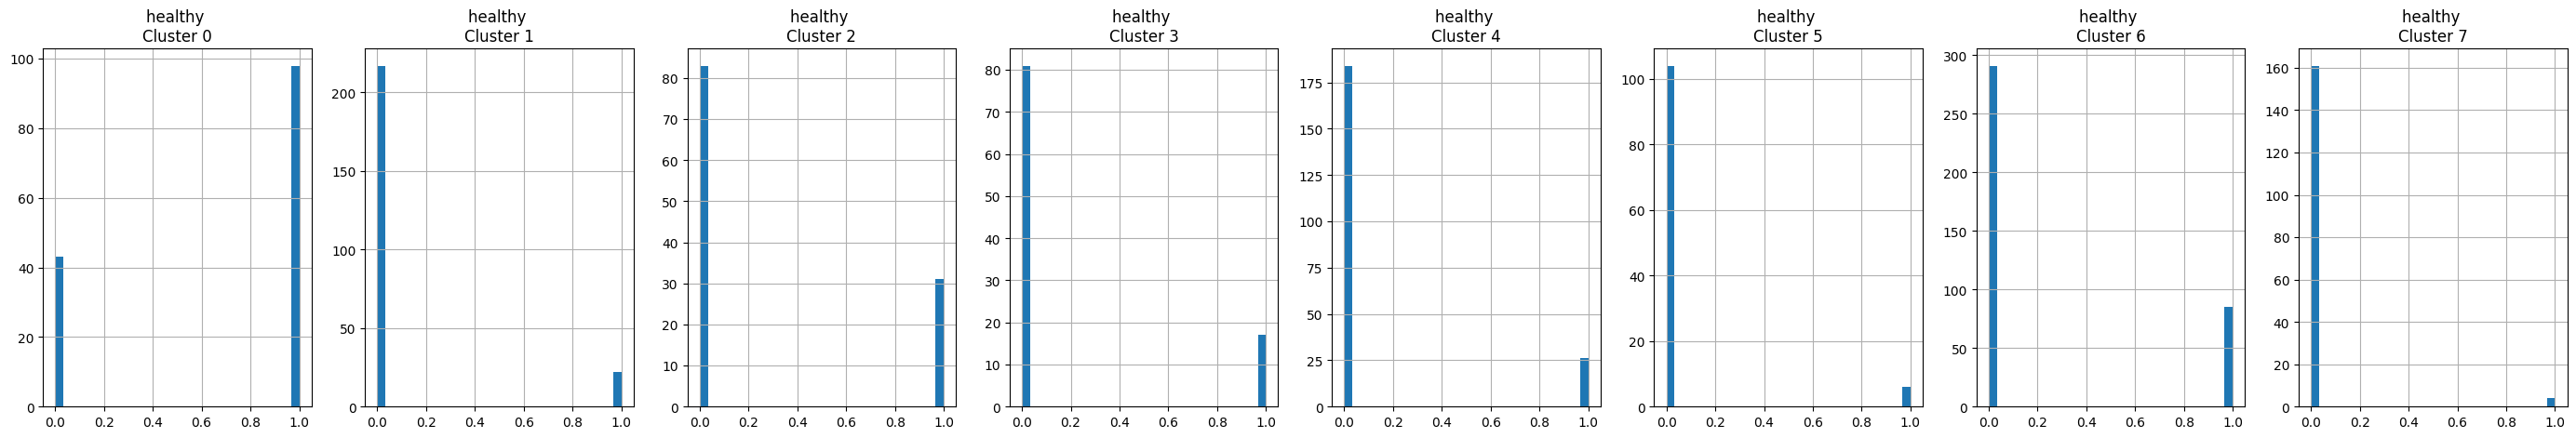

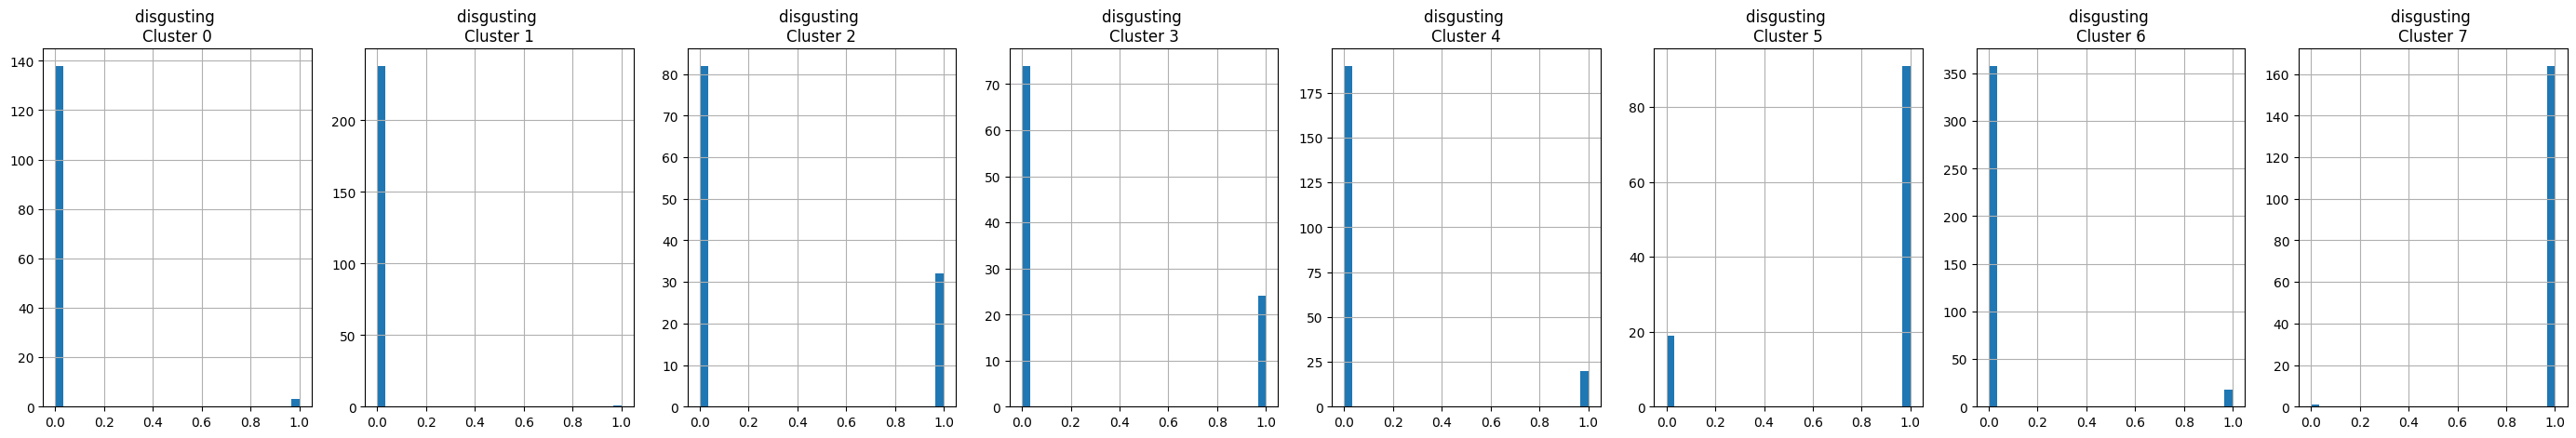

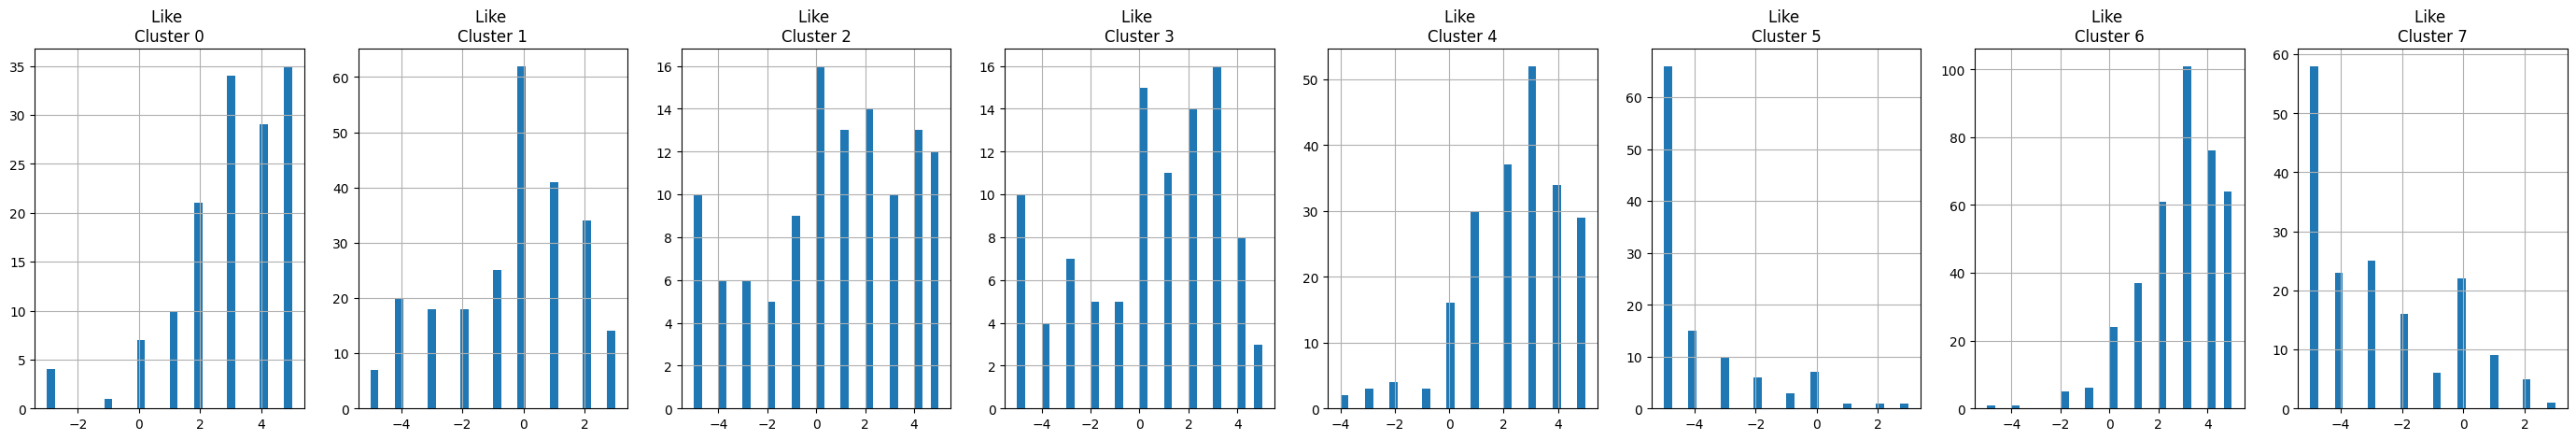

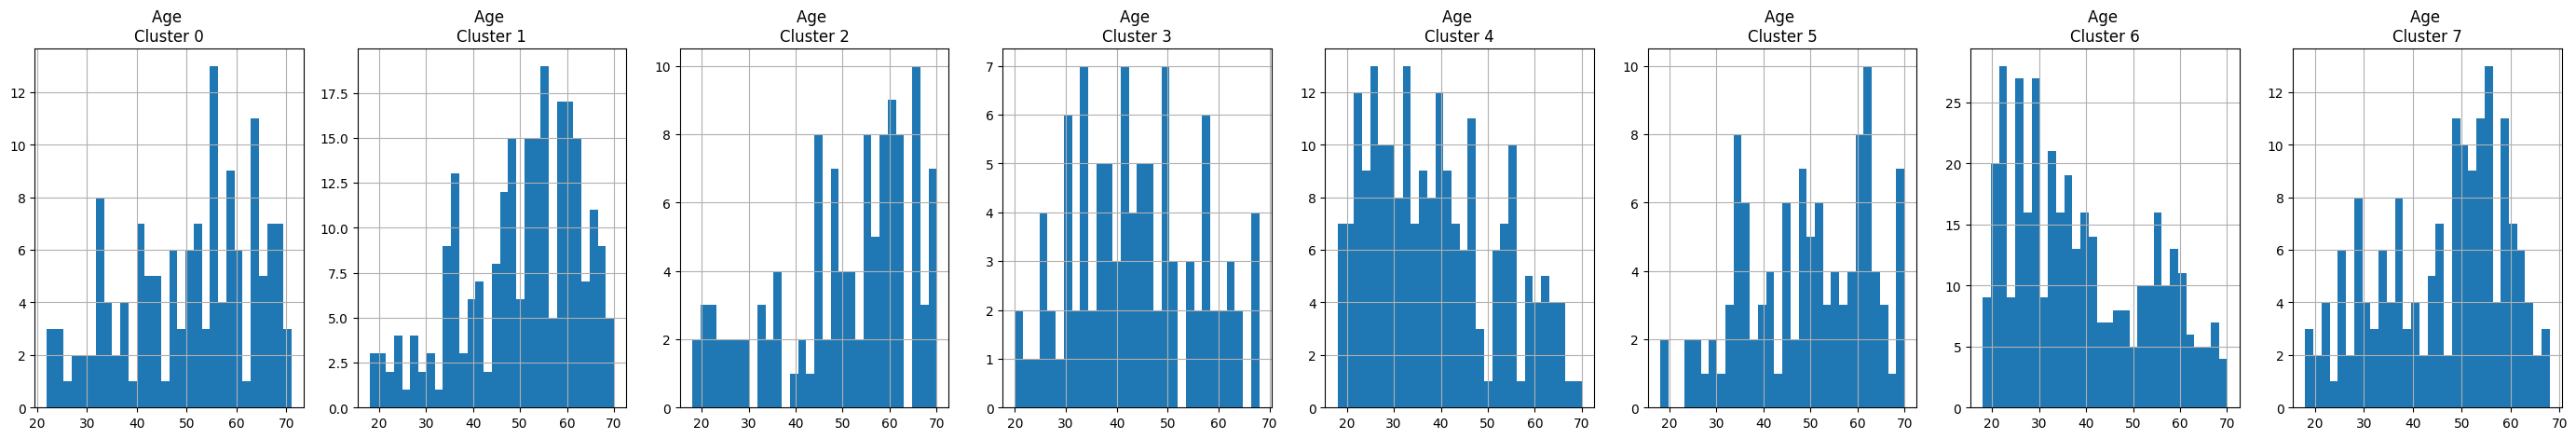

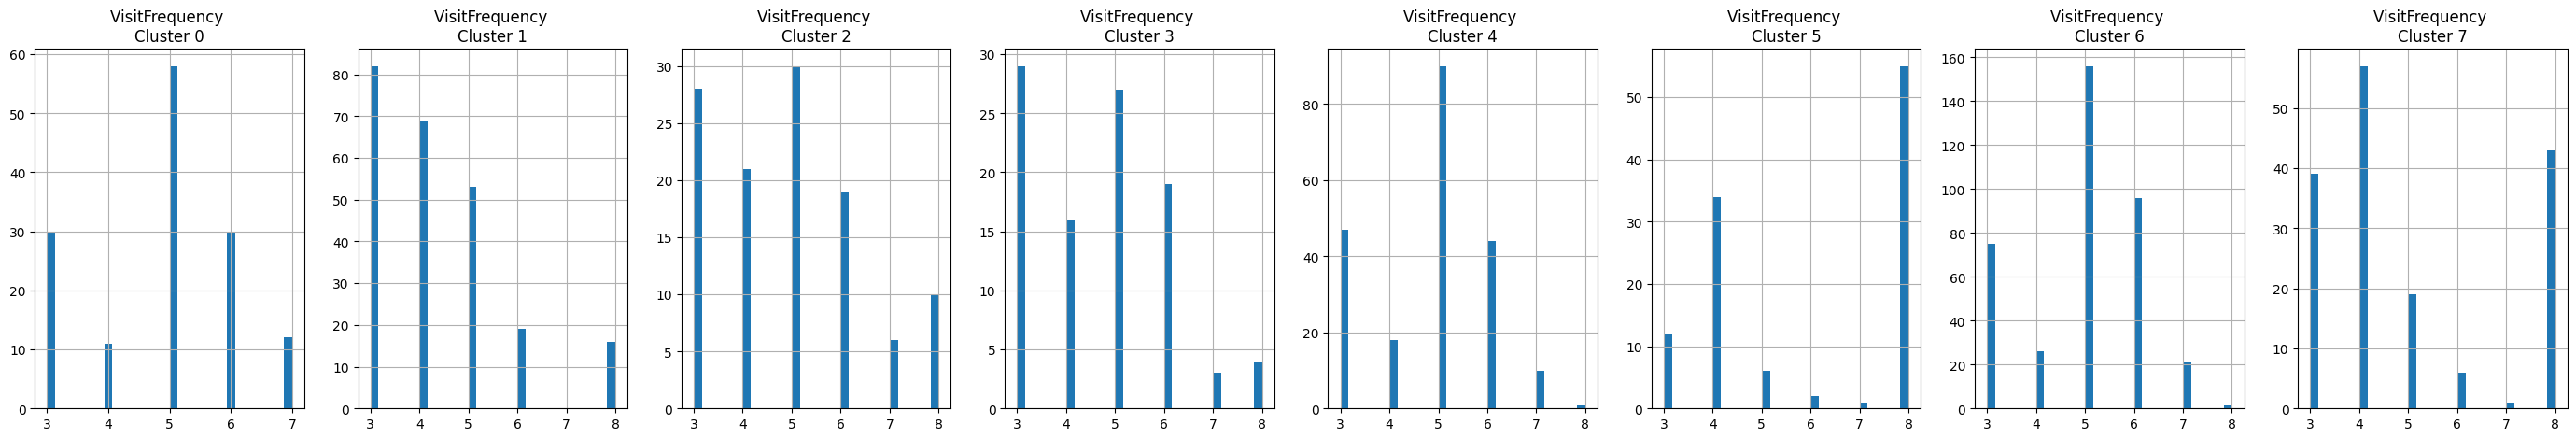

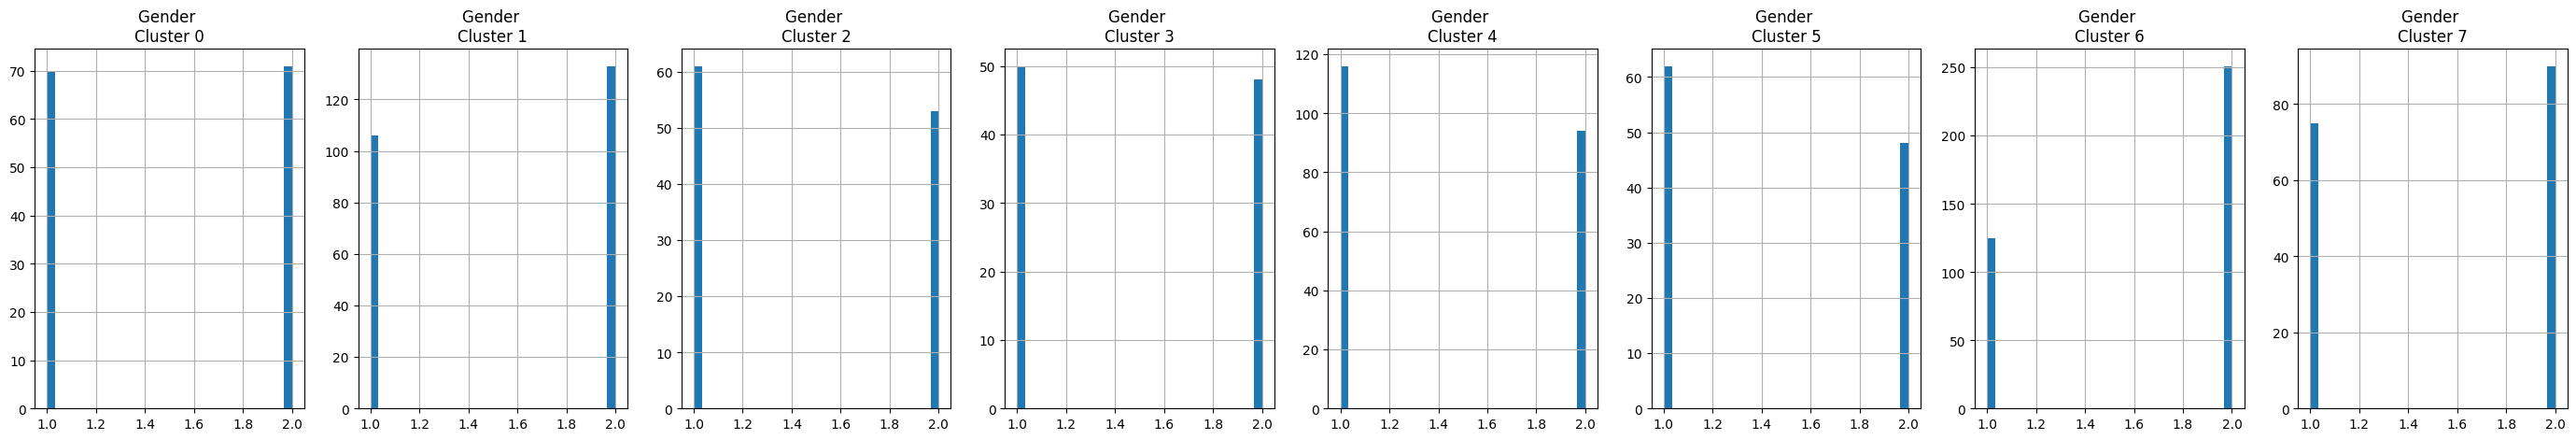

In [ ]:
# Plot the histogram of various clusters (one cluster = one column with all features)
for feature in data.columns:
  plt.figure(figsize=(35,5))
  for centroid in range(8):
    plt.subplot(1,8,centroid+1)
    cluster = data_with_centroids[data_with_centroids.centroid==centroid]
    cluster[feature].hist(bins=30)
    plt.title(f'{feature} \nCluster {centroid}')
plt.show()

Understading the different segments determined with K-Means

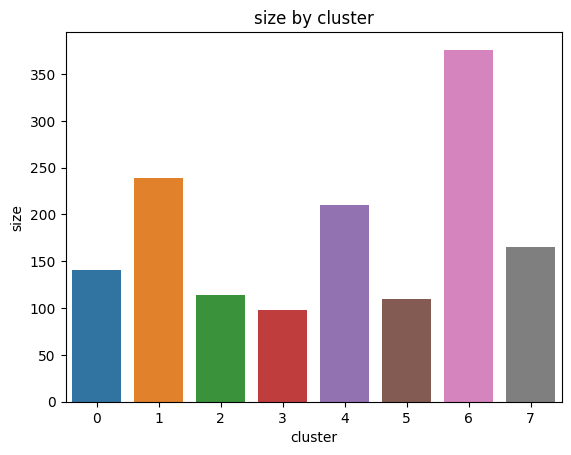

In [ ]:
#characteristics of the different clusters using their centroids
cluster_centroids = scaler.inverse_transform(cluster_centers)
cluster_centroids = pd.DataFrame(data=cluster_centroids, columns=[data.columns])
#cluster_centroids
cluster_size = []
for centroid, cluster_df in data_with_centroids.groupby("centroid"):
        cluster_size.append([centroid, len(cluster_df)])
cluster_sizes = pd.DataFrame(cluster_size, columns = ["cluster", "size"])
cluster_sizes.set_index("cluster", drop = True, inplace = True)
sns.barplot(x=cluster_sizes.index, y='size', data=cluster_sizes)
plt.title('size by cluster')
plt.show()


In [6]:
import pandas as pd
from pandas.io.parsers.readers import read_csv
data=read_csv('mcdonalds.csv')
bin = data.iloc[:,0:11]
df = pd.get_dummies(bin) # converting to binary values
df = df.drop(df.columns[0::2], axis = 1)
# renaming the columns
df.columns = ["yummy","convenient","spicy","fattening","greasy","fast","cheap","tasty","expensive","healthy","disgusting"]
# adding the descriptor variables
df["Like"] = data["Like"]
df["Age"] = data["Age"]
df["Gender"] = data["Gender"]
data_ = pd.read_csv("segment_data.csv") # this file contains the extracted segment
data_.head()

,Unnamed: 0,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,Gender,segment
0,0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Female,Segment 1
1,1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Female,Segment 0
2,2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Female,Segment 5
3,3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Female,Segment 0
4,4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Male,Segment 1


In [8]:
df["segment"] = data_["segment"]
# renaming the segments
df['segment'] = df['segment'].replace([0,1,2,3,4,5,6,7],['Segment 0',"Segment 1","Segment 2","Segment 3","Segment 4","Segment 5","Segment 6","Segment 7"])
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,Gender,segment
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Female,Segment 1
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Female,Segment 0
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Female,Segment 5
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Female,Segment 0
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Male,Segment 1


Mosaic plot: (Like)

In [11]:
from statsmodels.graphics.mosaicplot import mosaic

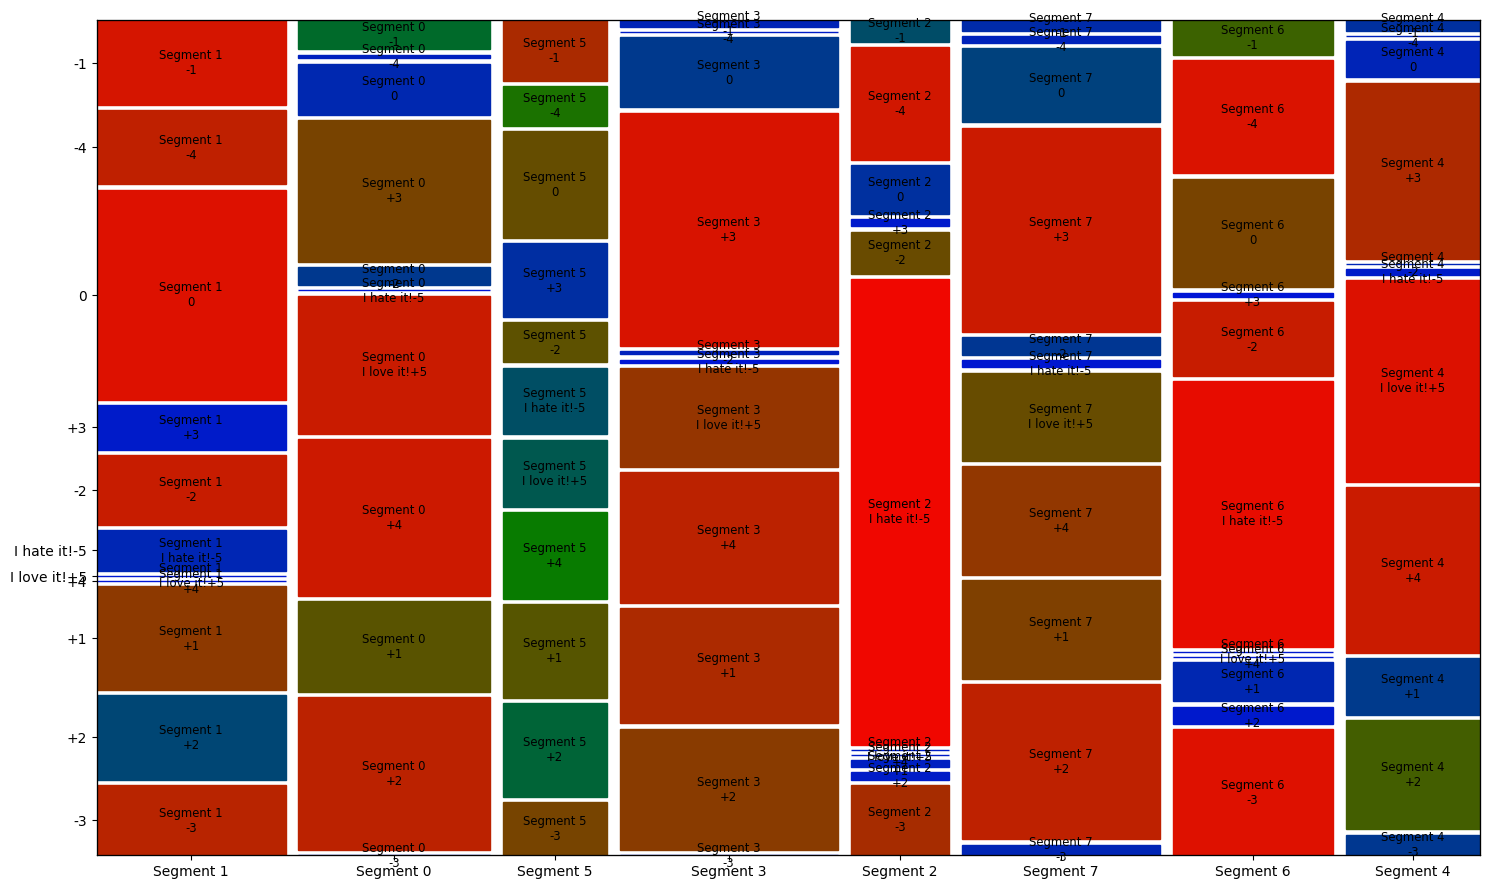

In [12]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [15, 9]
plt.rcParams["figure.autolayout"] = True
mosaic(df, ['segment', 'Like'], gap=0.01,statistic = True)
plt.show()

Mosaic plot: (Gender)

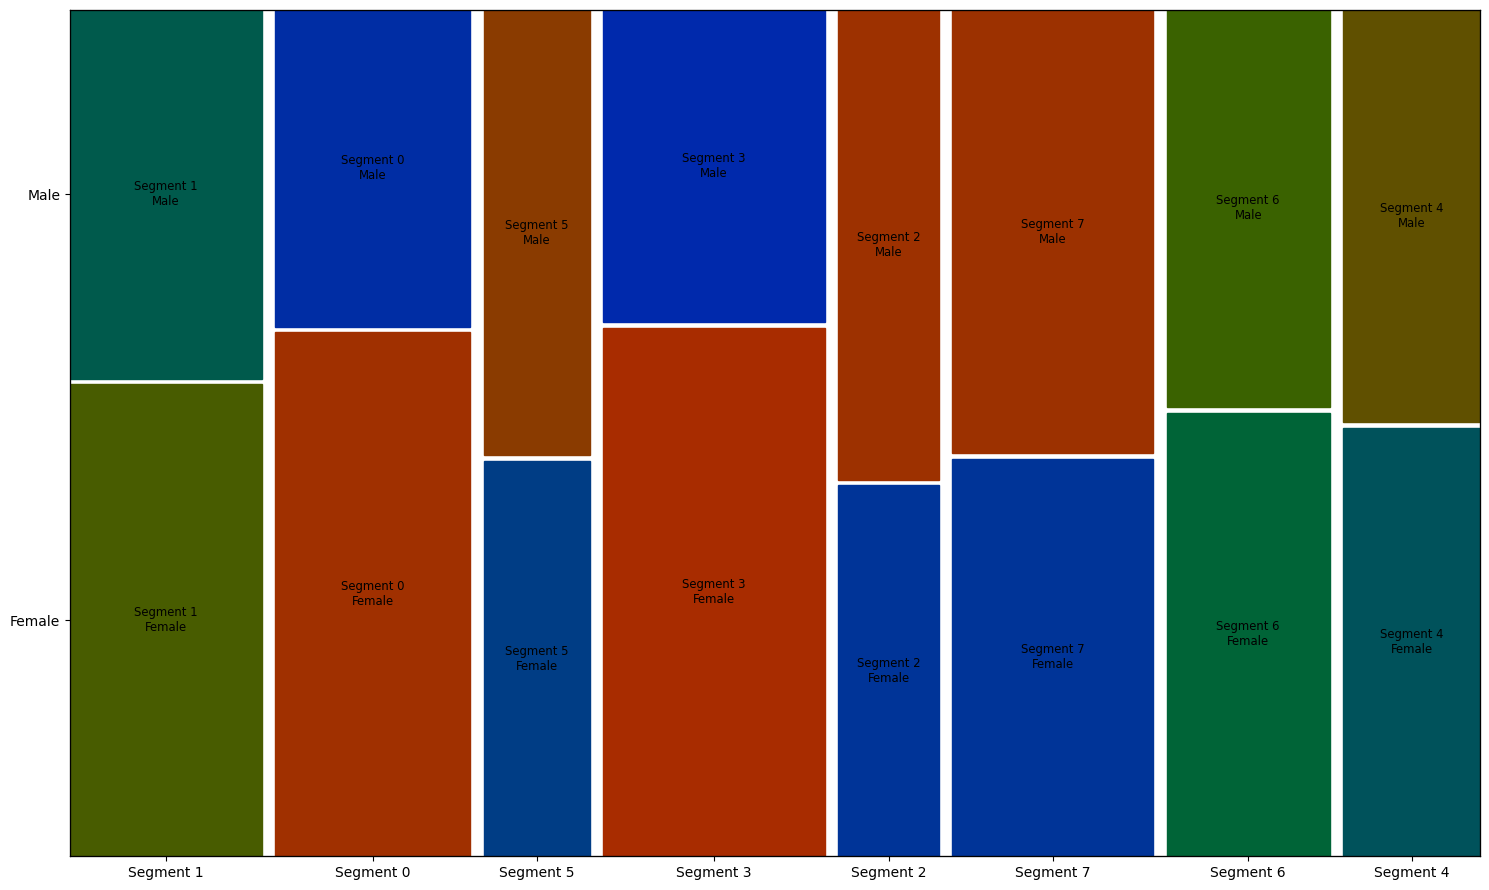

In [13]:
plt.rcParams["figure.figsize"] = [15, 9]
plt.rcParams["figure.autolayout"] = True
mosaic(df, ['segment', 'Gender'],gap=0.01,statistic = True)
plt.show()

Box plot: (Age)

<Axes: xlabel='segment', ylabel='Age'>

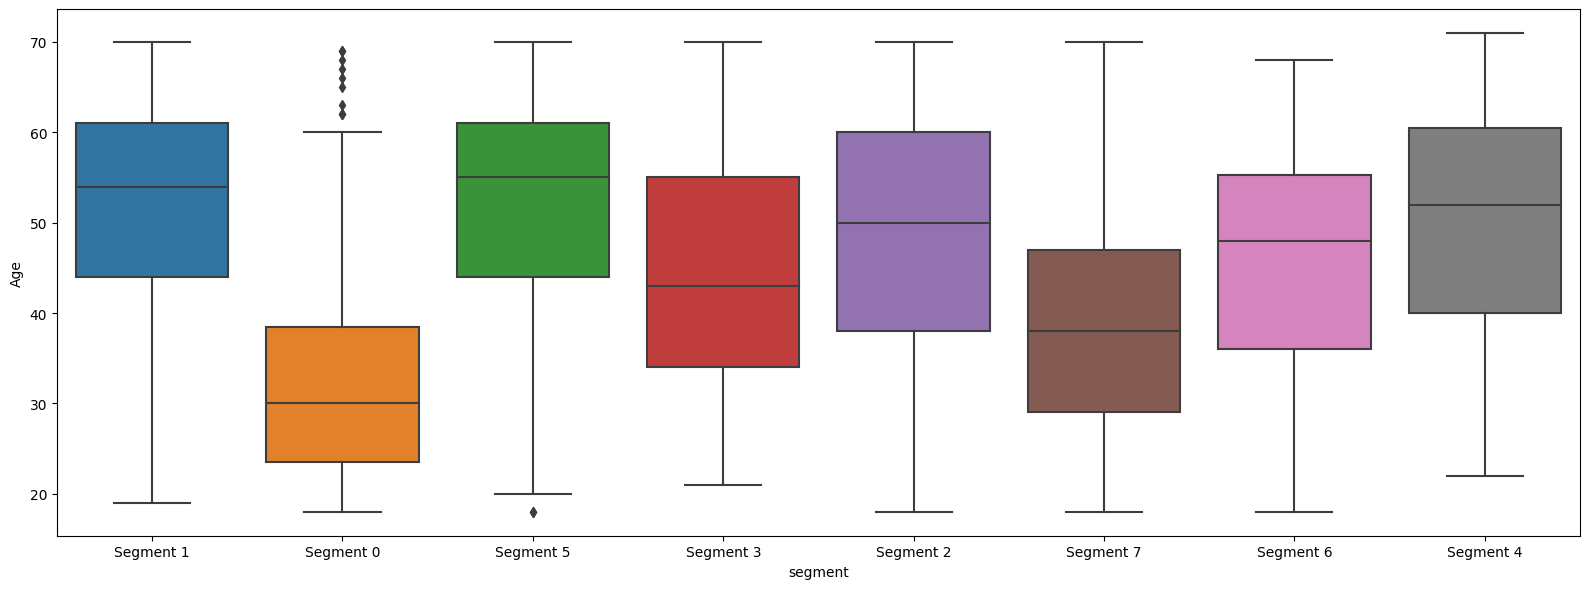

In [15]:
import seaborn as sns
plt.figure(figsize=(16, 6))
sns.boxplot(x = "segment", y = "Age",data = df)

Segment Seperation Plot: (PCA)

In [16]:
df_new = df.iloc[:,:11]
df_new.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0


In [17]:
y = df["segment"]
from sklearn.decomposition import PCA
pcamodel = PCA(n_components=2)
pca = pcamodel.fit_transform(df_new)
pca.shape

(1453, 2)

In [18]:
def myplot(score,coeff,labels=True):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley,s=5)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')

    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

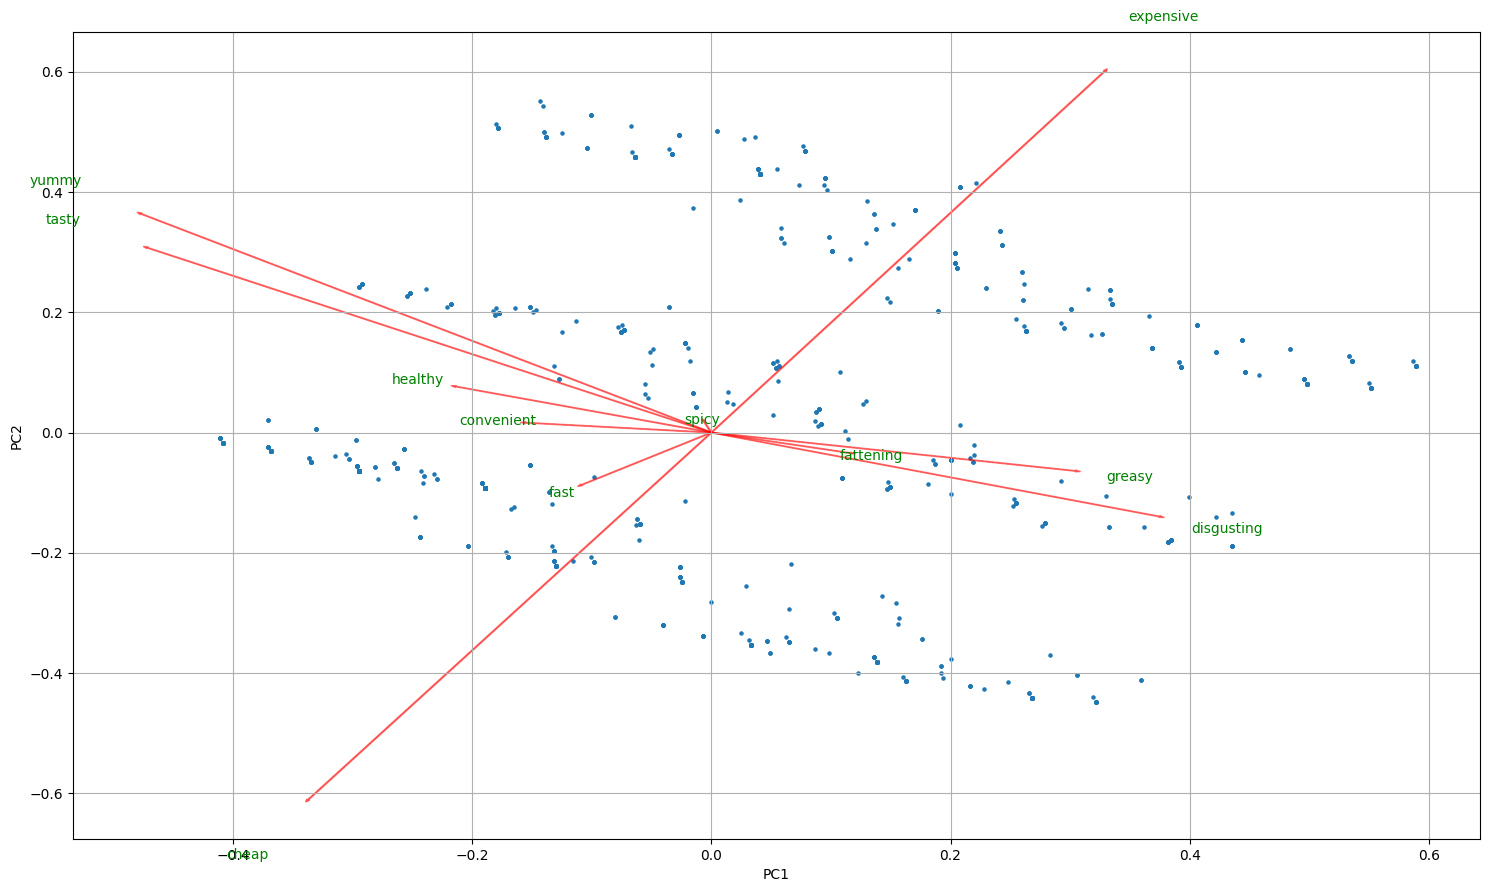

In [20]:
import numpy as np
myplot(pca[:,0:2],np.transpose(pcamodel.components_[0:2, :]),list(df_new.columns))
plt.show()

PCA with labels

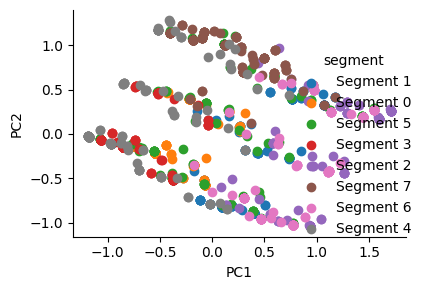

In [27]:
import seaborn as sns
from seaborn import FacetGrid
pca_data = pd.DataFrame(pca,columns = ["PC1","PC2"])
pca_data["segment"] = df["segment"]
sns.FacetGrid(pca_data, hue="segment").map(plt.scatter, 'PC1', 'PC2').add_legend()
plt.show()

Segment Profile Plot:

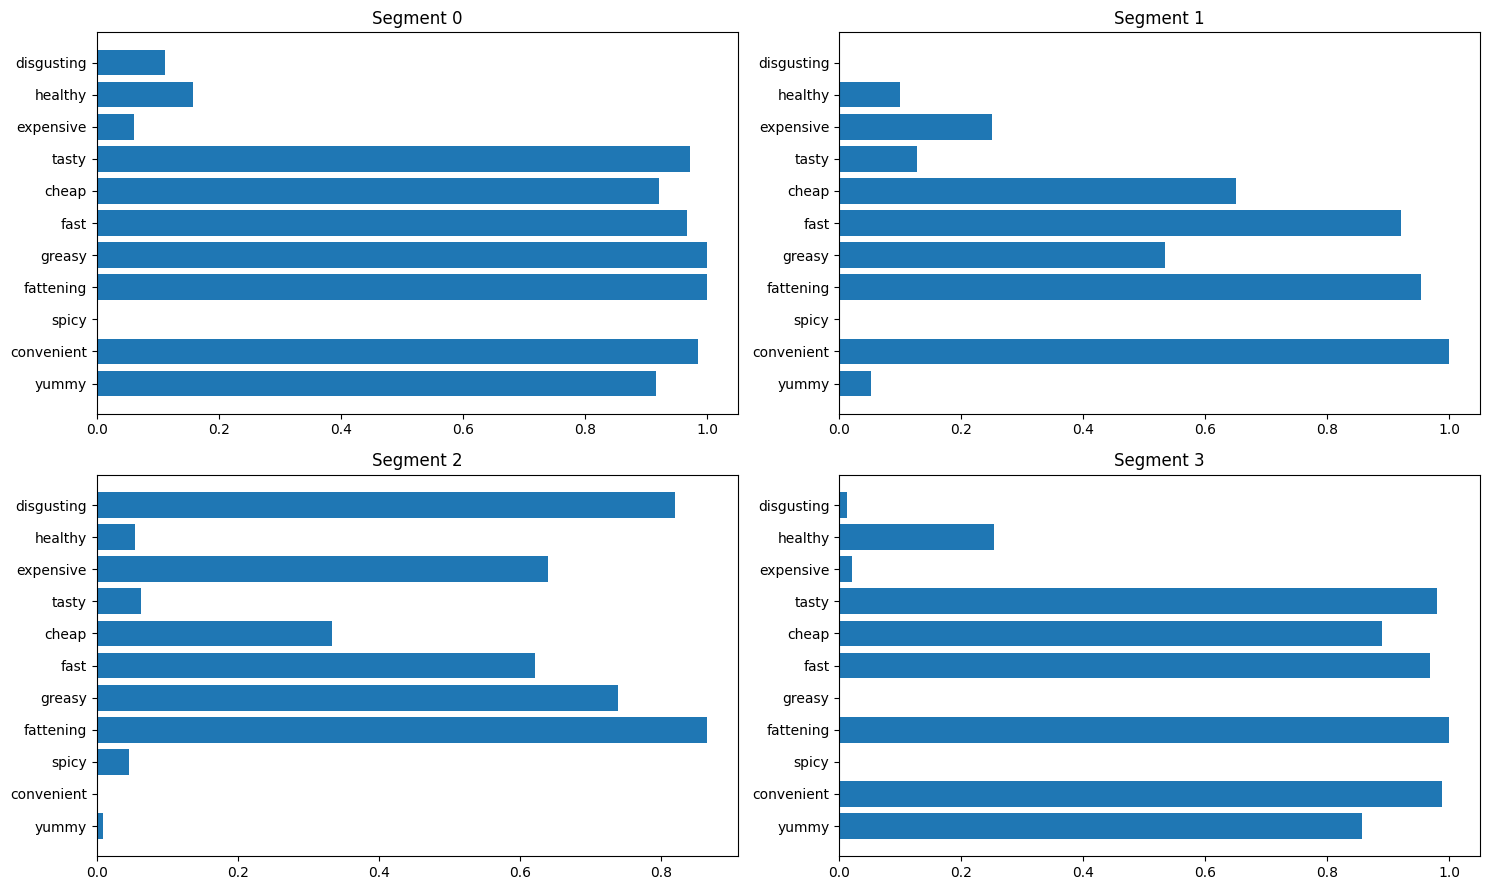

In [28]:
import warnings
warnings.filterwarnings("ignore")
df_new["segment"] = df["segment"]
def top_feature_(data,target,class_):
    x1 = data.groupby(by = target)
    x2 = x1.get_group(class_)
    x3 = list(dict(x2.mean()).keys())
    x4 = list(dict(x2.mean()).values())
    plt.title("{}".format(class_))
    plt.barh(x3,x4)
plt.subplot(2,2,1)
top_feature_(df_new,"segment","Segment 0")

plt.subplot(2,2,2)
top_feature_(df_new,"segment","Segment 1")

plt.subplot(2,2,3)
top_feature_(df_new,"segment","Segment 2")

plt.subplot(2,2,4)
top_feature_(df_new,"segment","Segment 3")

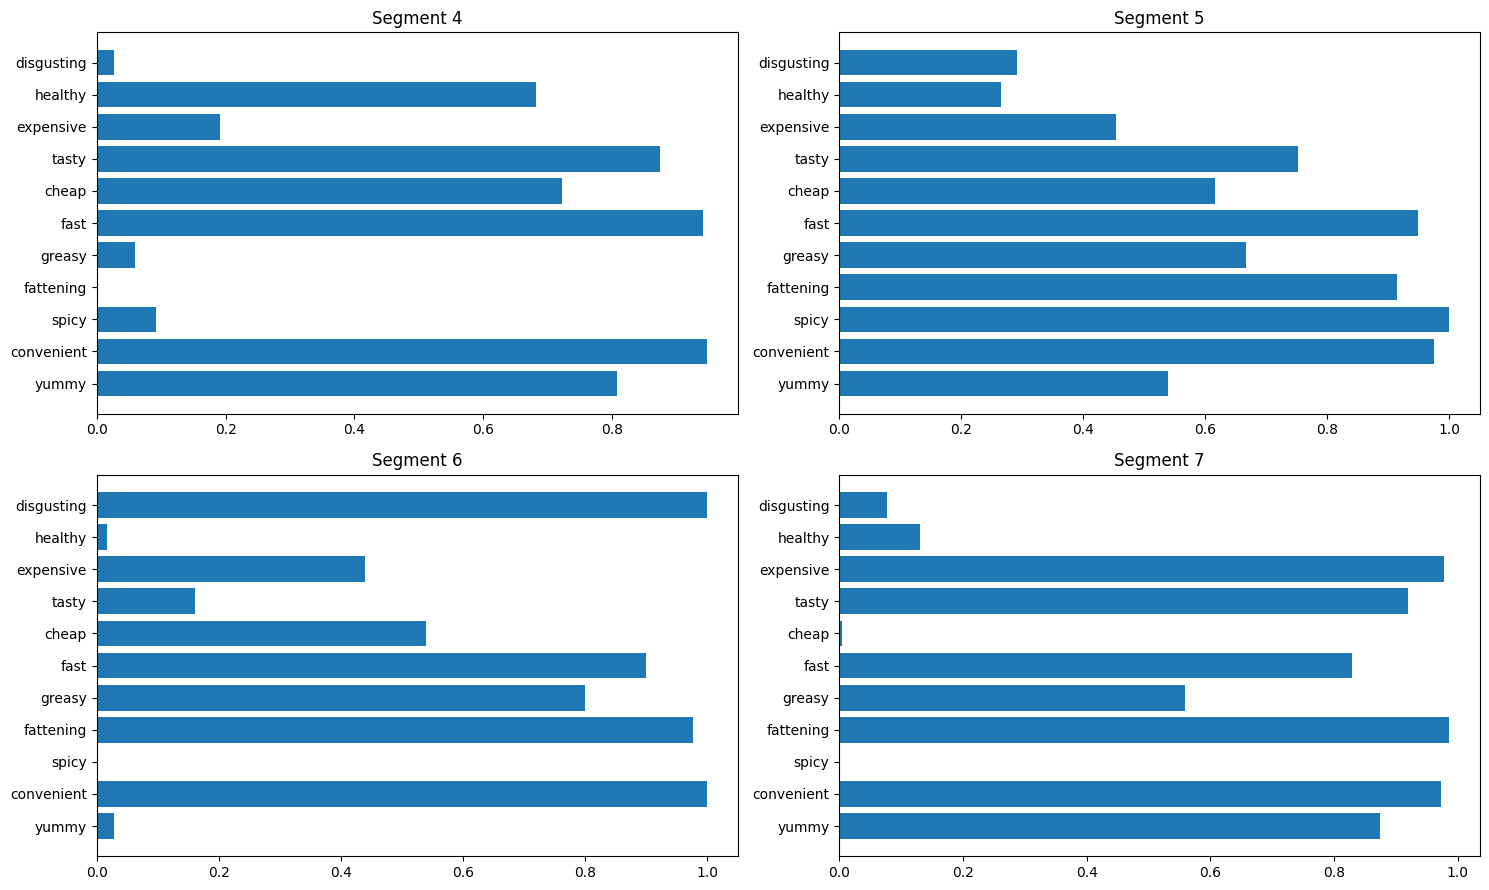

In [29]:
plt.subplot(2,2,1)
top_feature_(df_new,"segment","Segment 4")

plt.subplot(2,2,2)
top_feature_(df_new,"segment","Segment 5")

plt.subplot(2,2,3)
top_feature_(df_new,"segment","Segment 6")

plt.subplot(2,2,4)
top_feature_(df_new,"segment","Segment 7")

SEGMENT EVALUATION

In [30]:
df = pd.read_csv("segment_data.csv")
# renaming the segments
df['segment'] = df['segment'].replace([0,1,2,3,4,5,6,7],['Segment 0',"Segment 1","Segment 2","Segment 3", "Segment 4","Segment 5","Segment 6","Segment 7"])
df.head()


,Unnamed: 0,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,Gender,segment
0,0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Female,Segment 1
1,1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Female,Segment 0
2,2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Female,Segment 5
3,3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Female,Segment 0
4,4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Male,Segment 1


In [32]:
#Compare features
avg_data = df.groupby(['segment'], as_index=False).mean()
avg_data


,segment,Unnamed: 0,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Age
0,Segment 0,719.930233,0.916279,0.986047,0.000000,1.000000,1.000000,0.967442,0.920930,0.972093,0.060465,0.158140,0.111628,33.516279
1,Segment 1,745.787736,0.051887,1.000000,0.000000,0.952830,0.533019,0.919811,0.650943,0.127358,0.250000,0.099057,0.000000,51.391509
2,Segment 2,713.522523,0.009009,0.000000,0.045045,0.864865,0.738739,0.621622,0.333333,0.063063,0.639640,0.054054,0.819820,49.234234
3,Segment 3,712.448980,0.857143,0.987755,0.000000,1.000000,0.000000,0.967347,0.889796,0.979592,0.020408,0.253061,0.012245,44.444898
4,Segment 4,696.596026,0.807947,0.947020,0.092715,0.000000,0.059603,0.940397,0.721854,0.874172,0.192053,0.682119,0.026490,50.059603
5,Segment 5,647.324786,0.538462,0.974359,1.000000,0.914530,0.666667,0.948718,0.615385,0.752137,0.452991,0.264957,0.290598,50.589744
6,Segment 6,782.522222,0.027778,1.000000,0.000000,0.977778,0.800000,0.900000,0.538889,0.161111,0.438889,0.016667,1.000000,45.661111
7,Segment 7,749.810811,0.873874,0.972973,0.000000,0.986486,0.558559,0.828829,0.004505,0.918919,0.977477,0.130631,0.076577,39.004505


In [33]:
import seaborn as sns

<Axes: xlabel='segment', ylabel='yummy'>

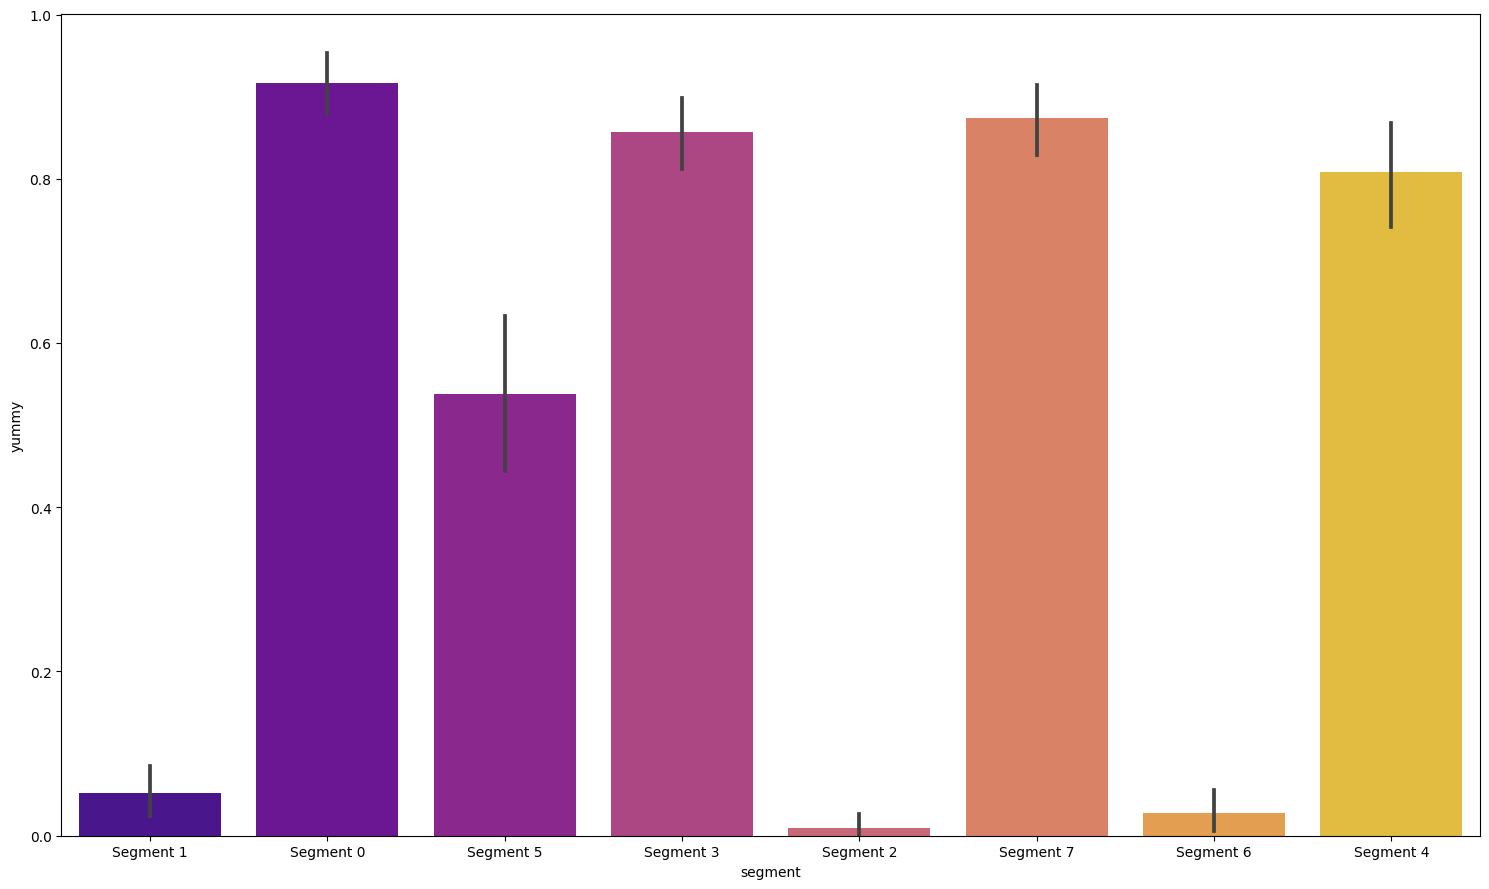

In [42]:
sns.barplot(x=df['segment'],y=df['yummy'],palette="plasma",data=avg_data)

<Axes: xlabel='segment', ylabel='spicy'>

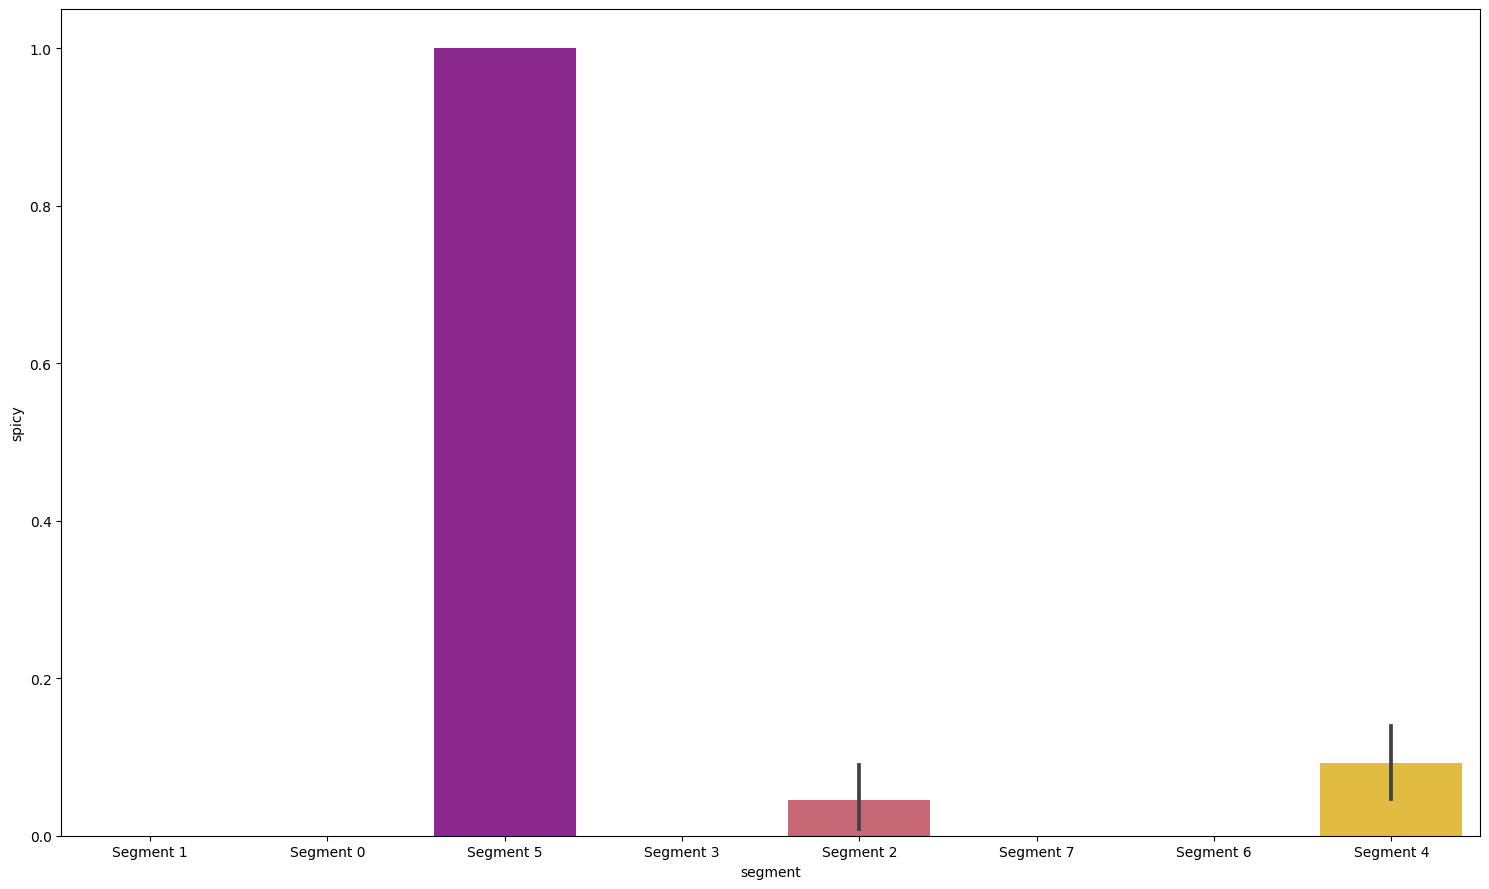

In [46]:
sns.barplot(x=df['segment'],y=df['spicy'],palette="plasma",data=avg_data)

<Axes: xlabel='segment', ylabel='fattening'>

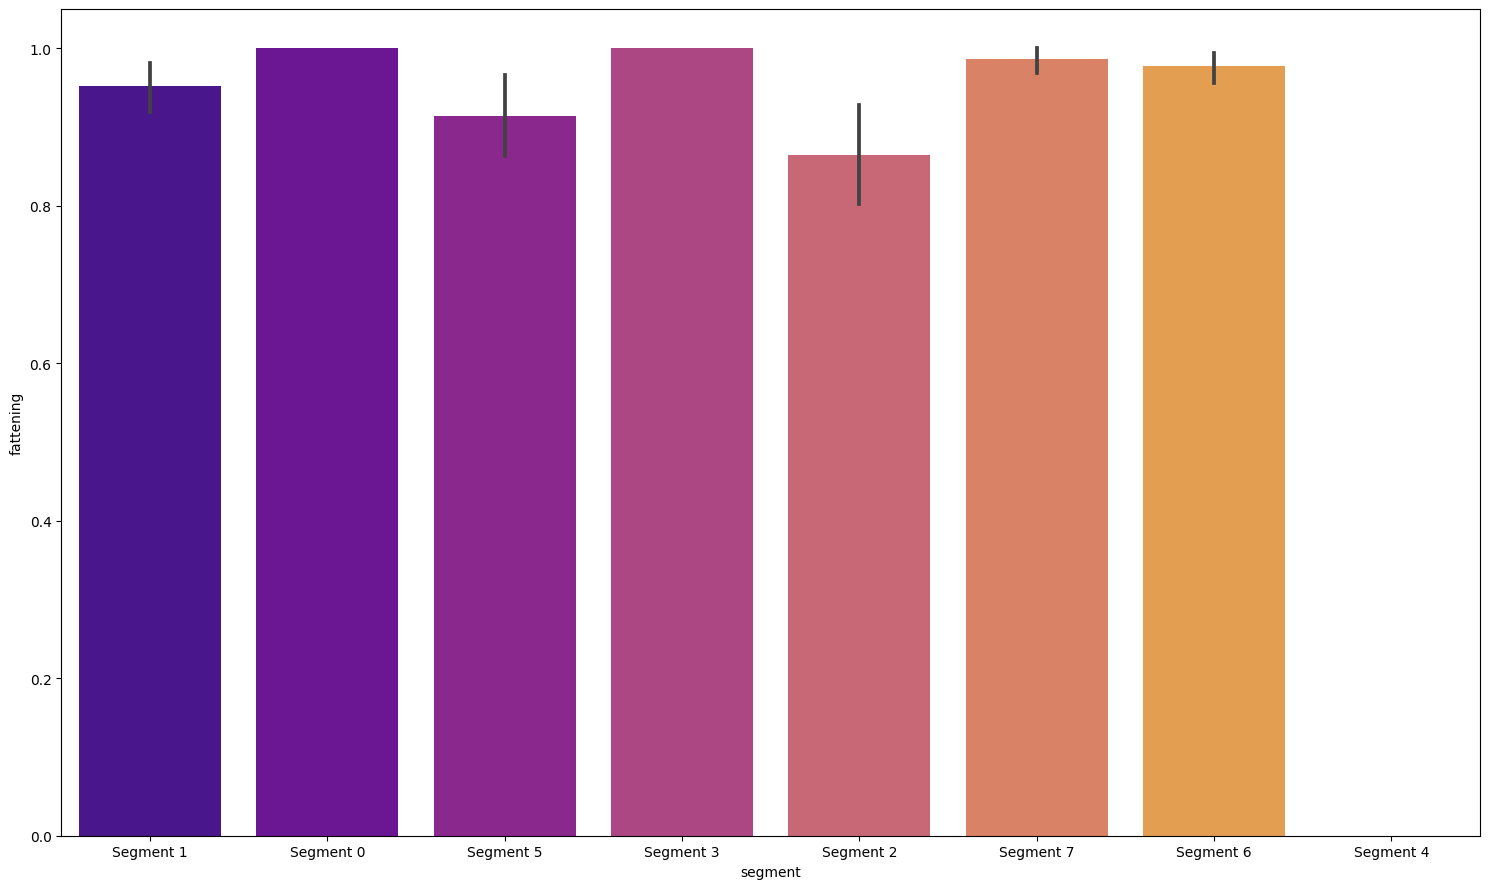

In [48]:
sns.barplot(x=df['segment'],y=df['fattening'],palette="plasma",data=avg_data)

<Axes: xlabel='segment', ylabel='greasy'>

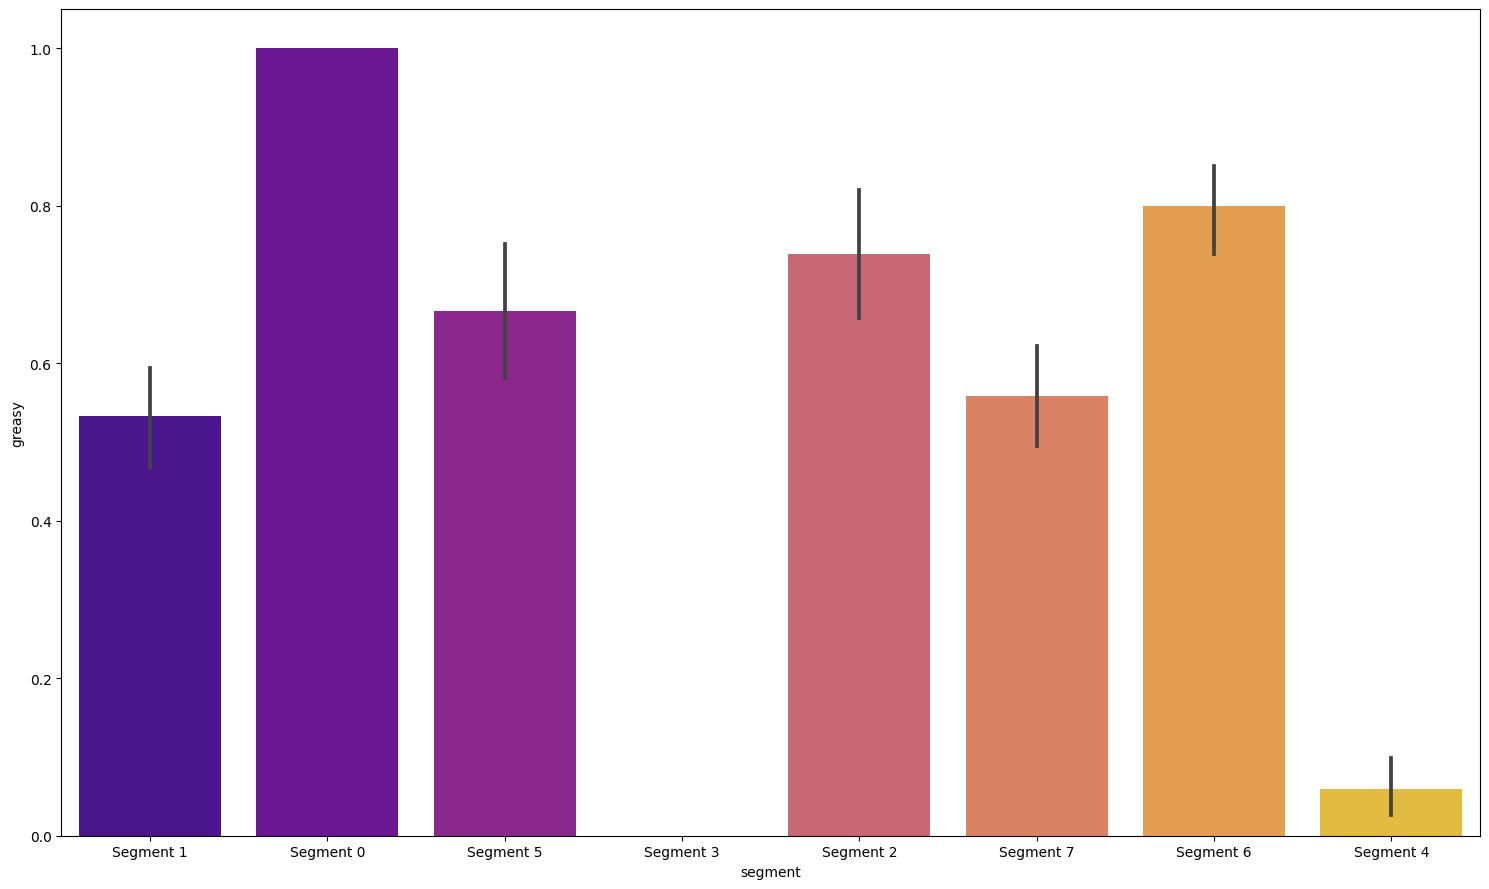

In [49]:
sns.barplot(x=df['segment'],y=df['greasy'],palette="plasma",data=avg_data)

<Axes: xlabel='segment', ylabel='fast'>

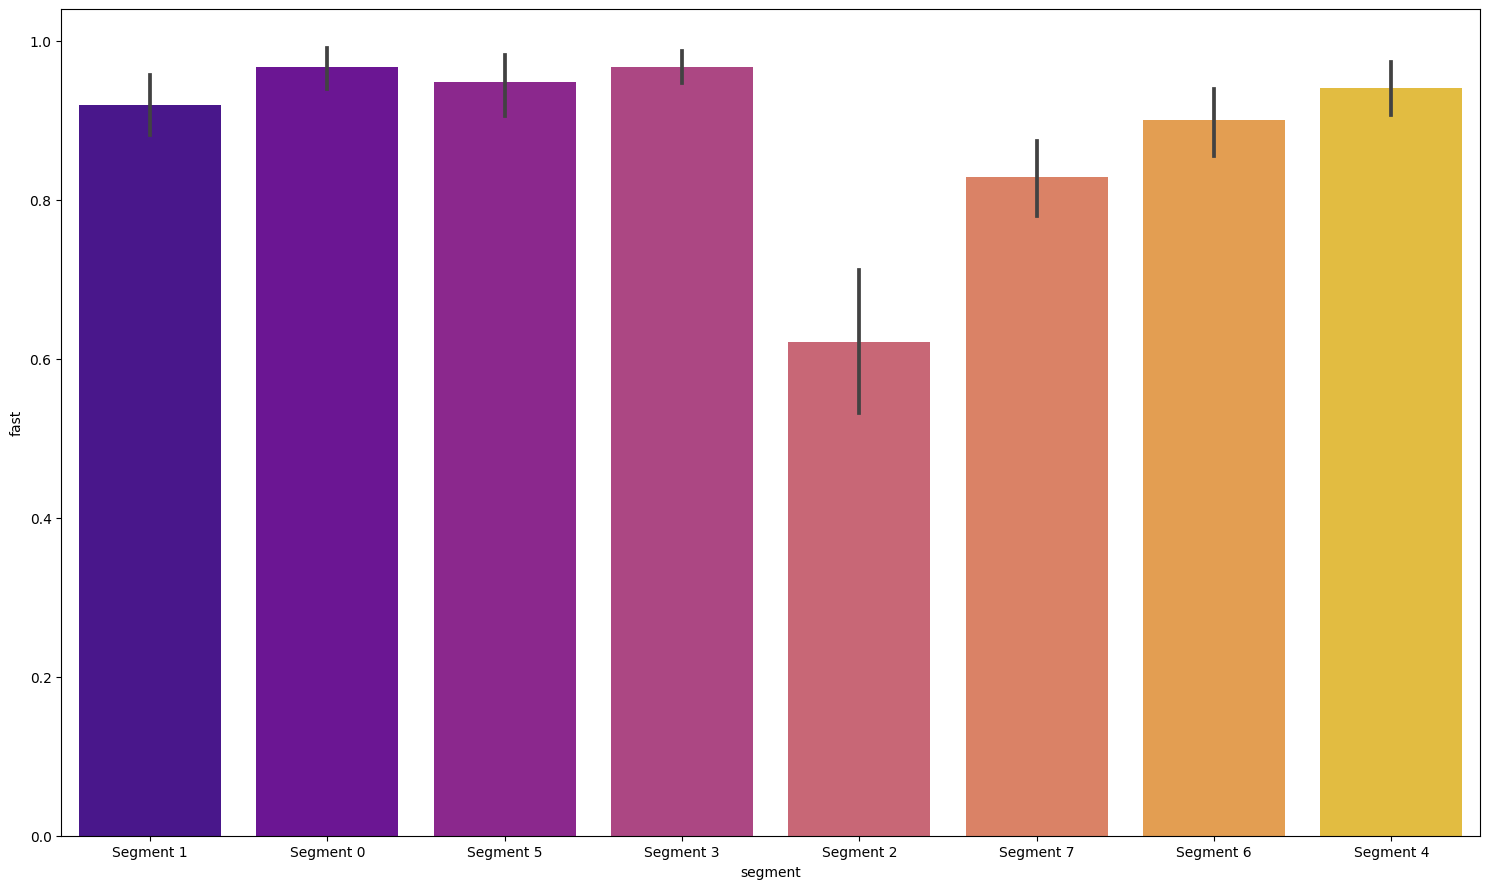

In [50]:
sns.barplot(x=df['segment'],y=df['fast'],palette="plasma",data=avg_data)

<Axes: xlabel='segment', ylabel='cheap'>

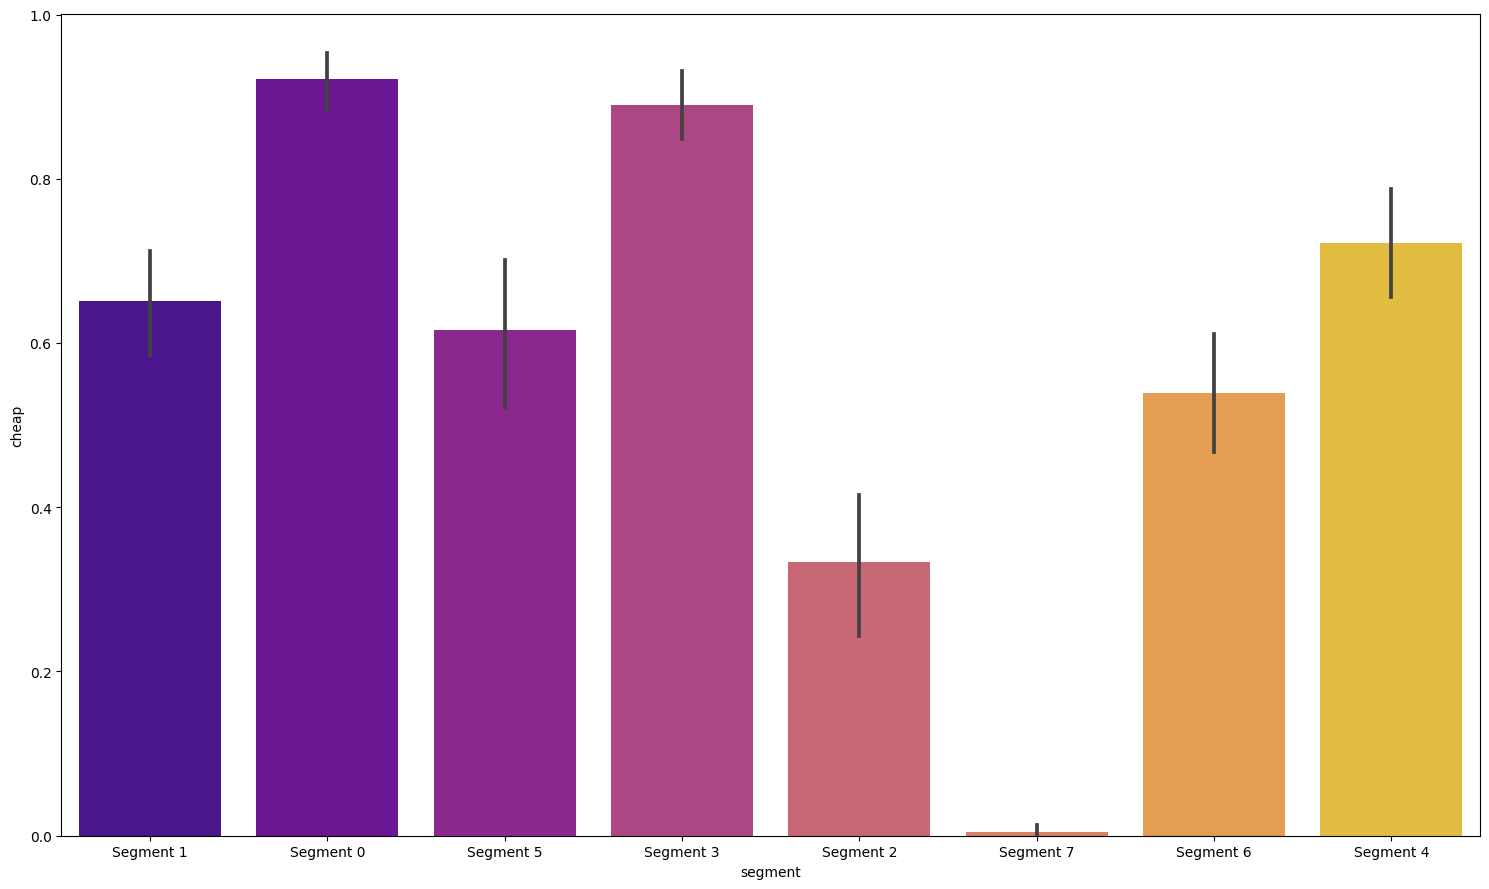

In [51]:
sns.barplot(x=df['segment'],y=df['cheap'],palette="plasma",data=avg_data)


<Axes: xlabel='segment', ylabel='tasty'>

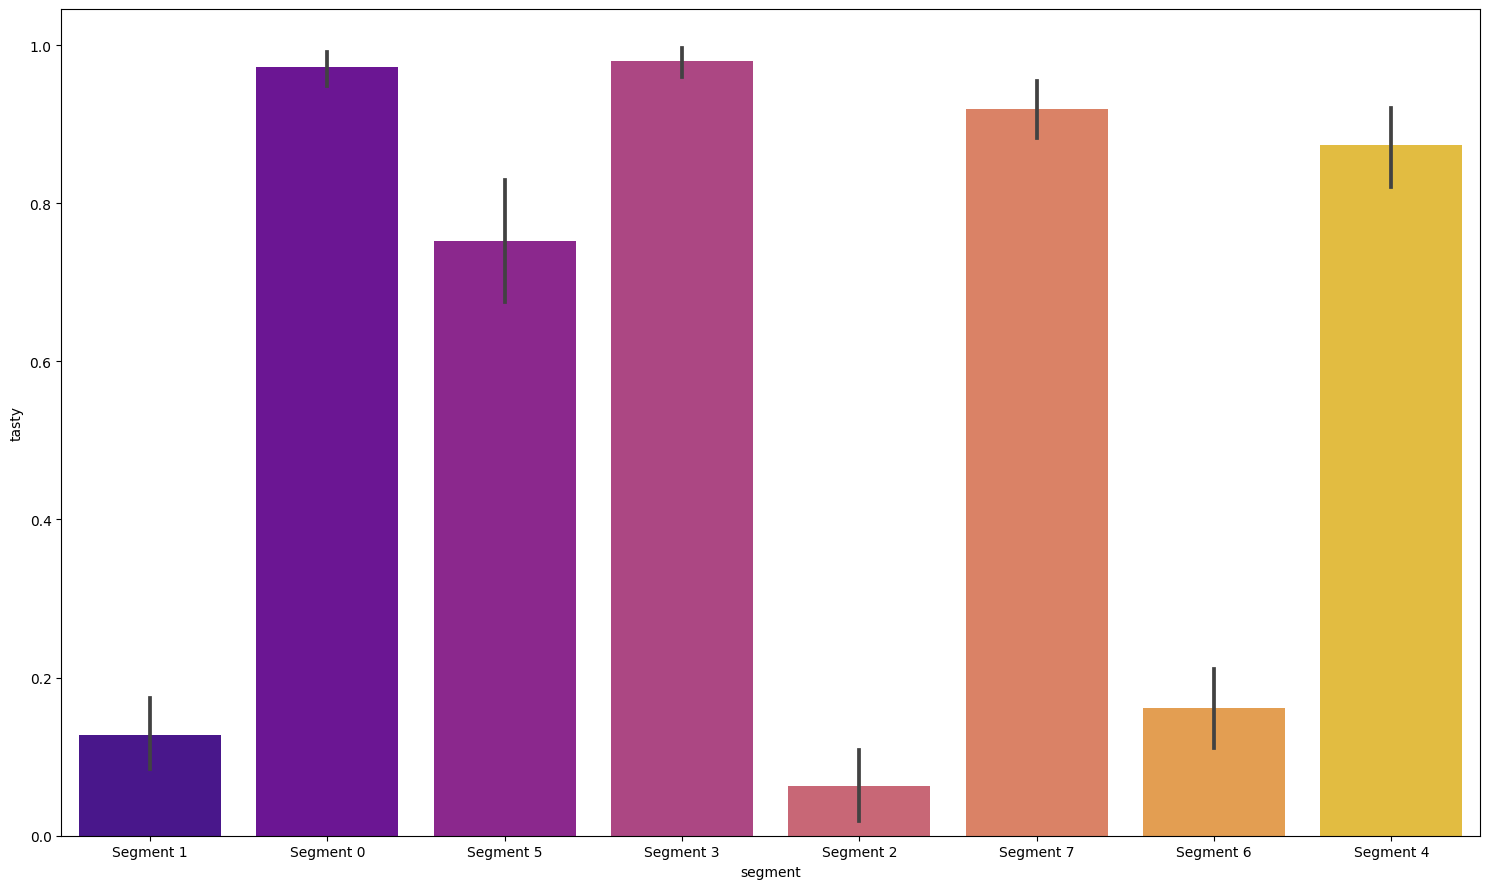

In [52]:
sns.barplot(x=df['segment'],y=df['tasty'],palette="plasma",data=avg_data)


<Axes: xlabel='segment', ylabel='expensive'>

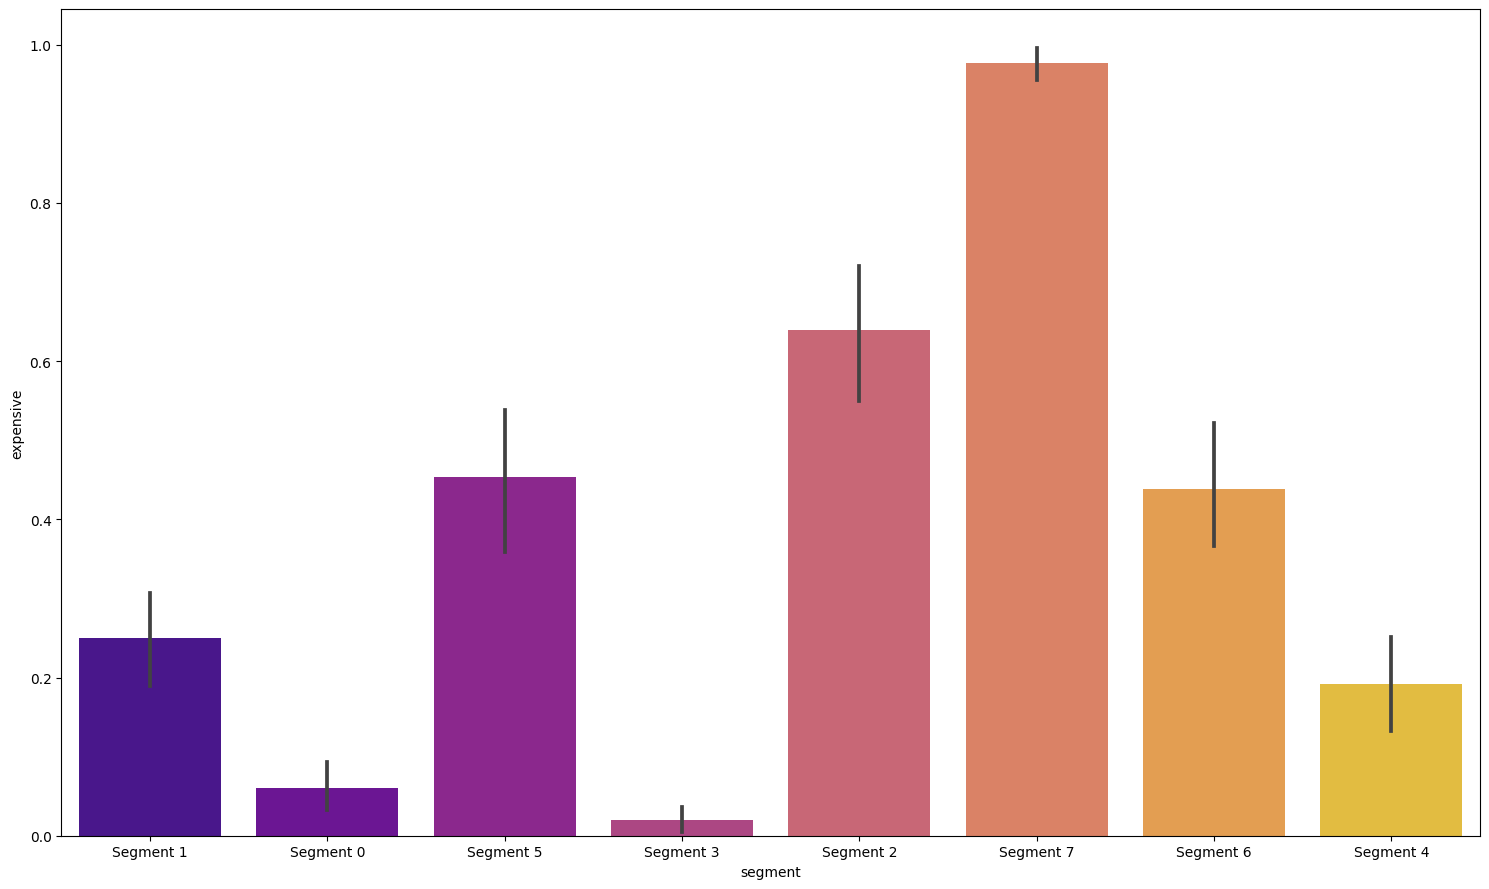

In [55]:
sns.barplot(x=df['segment'],y=df['expensive'],palette="plasma",data=avg_data)


<Axes: xlabel='segment', ylabel='healthy'>

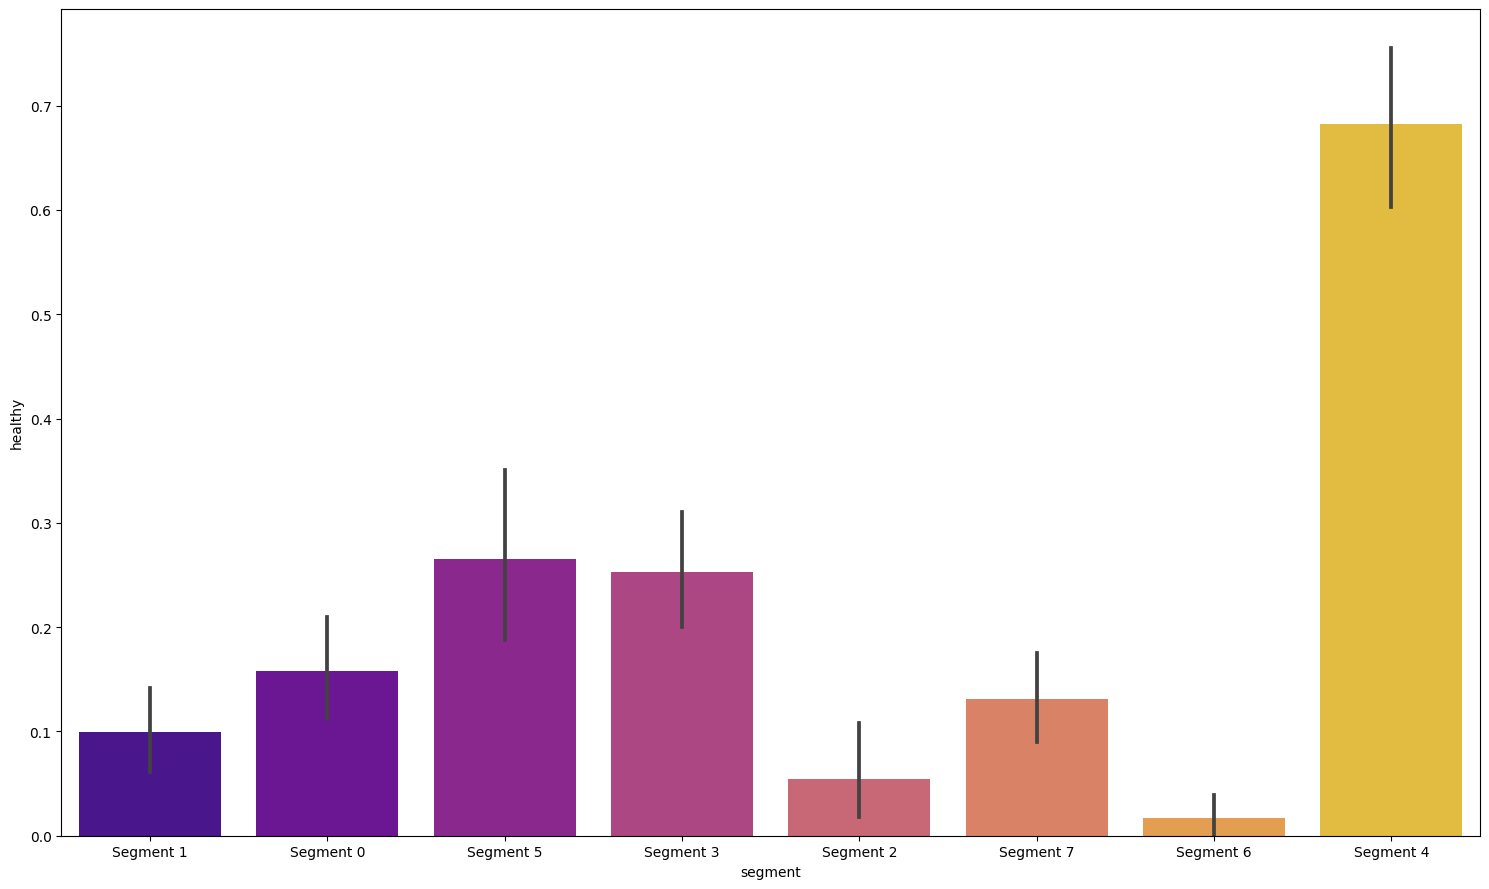

In [54]:
sns.barplot(x=df['segment'],y=df['healthy'],palette="plasma",data=avg_data)

<Axes: xlabel='segment', ylabel='disgusting'>

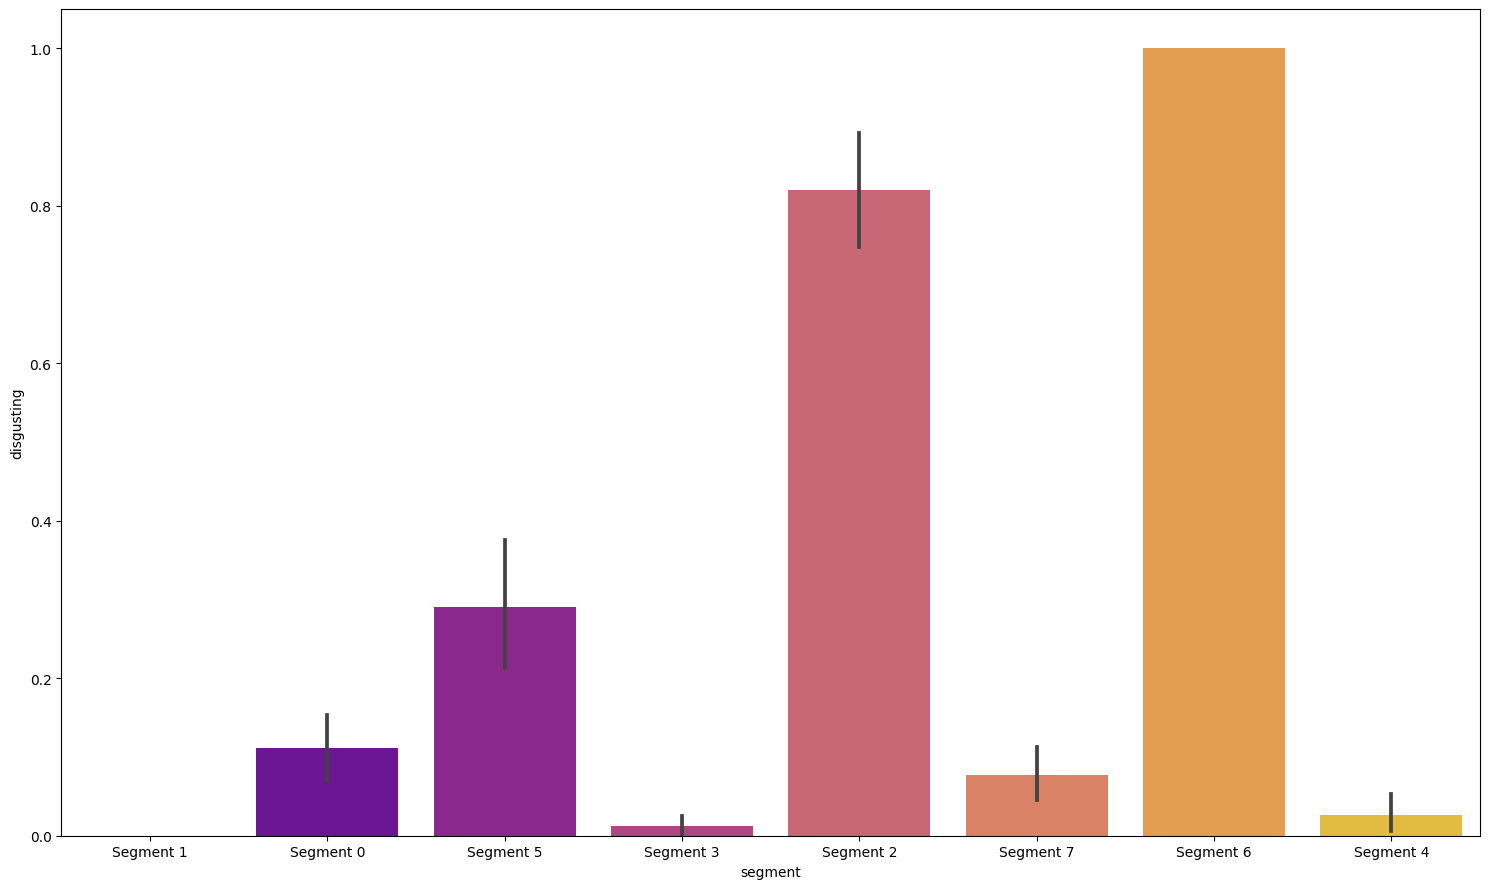

In [53]:
sns.barplot(x=df['segment'],y=df['disgusting'],palette="plasma",data=avg_data)

GENDER BREAKDOWN

In [47]:
#compare distribution of gender (male/Female) accross segments
df2 = pd.DataFrame(df.groupby(['segment','Gender'])['Gender'].count())
df2

Gender
segment   Gender        
Segment 0 Female     134
          Male        81
Segment 1 Female     119
          Male        93
Segment 2 Female      49
          Male        62
Segment 3 Female     154
          Male        91
Segment 4 Female      77
          Male        74
Segment 5 Female      55
          Male        62
Segment 6 Female      95
          Male        85
Segment 7 Female     105
          Male       117